# Introducción al aprendizaje máquina

El aprendizaje máquina consiste en crear **automáticamente** una función que, dados unos datos de entrada, nos de un resultado.

![](img/introDataMining.png)

# Bibliografía

**Deep Learning**, Ian Goodfellow
http://www.deeplearningbook.org/

**Pattern Recognition and Machine Learning**, M.Bishop: 
https://www.amazon.com/Pattern-Recognition-Learning-Information-Statistics/dp/0387310738
http://bfy.tw/I7jo

## Aprendizaje supervisado


En el aprendizaje supervisado nosotros enseñamos entradas y salidas. 

El algoritmo creará una **función** a partir de esos ejemplos. Este proceso se llama **entrenamiento**. El entrenamiento donde el algoritmo aprende.

Cuando le damos **datos nuevos**, una **función entrenada** nos dará el resultado correcto. 


![](./img/CajaNegra.png)

## Apredinzaje no supervisado

Encuentra estructuras en los datos sin necesidad de intervención externa.

# Optimización

Consiste en encontrar en mínimo o máximo de una función. Para todos los ejemplos vamos a suponer que buscamos el mínimo de una función.

Dada una función $f(X)$ donde $X$ puede ser una constante, un vector o una matriz, el objetivo es encontrar un valor de X tal que se garantice 

\\[
x^* = {argmin} _{x\in \mathbb {R} } \left\{ f(x) \right\}
\\]

Por ejemplo para $f(x)=x^2+3$:

\\[
x^* = {argmin} _{x\in \mathbb {R} } \left\{ x^2 \right\} = 0
\\]

\\[
f(x^*) = f(0) = 0^2+3 = 3
\\]


[1] -0.02020202

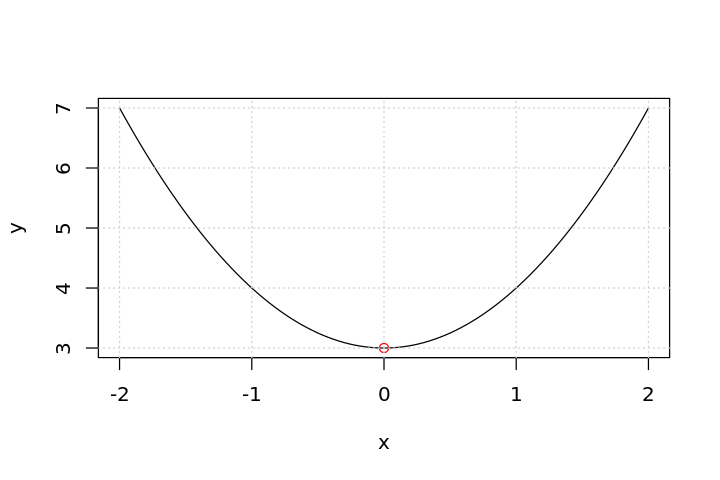

In [1]:
options(repr.plot.height=4,repr.plot.width=6)

myfunc<-function(x){ x^2+3 }

x<-seq(-2,2,length.out = 100)
y<-myfunc(x)

plot(x,y,t="l")
points(0,3,col="red")
grid()

x[which.min(y)]

## ¿Cómo encontramos el mínimo de una función?

Podemos calcularlo de forma **iterativa**. Es decir, inyectando en nuestro modelo un valor distinto para ver que valor tenemos a la salida. En función de los datos que metemos en la entrada vemos cual es la salida que tiene un valor más bajo.

Al ser un proceso iterativo tenemos que garantizar convergencia, es decir, dado un número suficientemente grande de iteraciones nuestro proceso encontrará el mínimo.

En algunos casos muy contados podemos saltar diréctamente al mínimo, pero por lo general este no será el caso.

### Ejemplo 1:

```
1. x_0 <- Asignamos un valor x al azar
2. x_new <- Elegimos otro valor de x próximo a x_0  al azar
3. Si f(x_new)<f(x_0) entonces x_0 <- x_new
4. Repetimos desde 2 un número N de veces
```

[1] 0.00941971

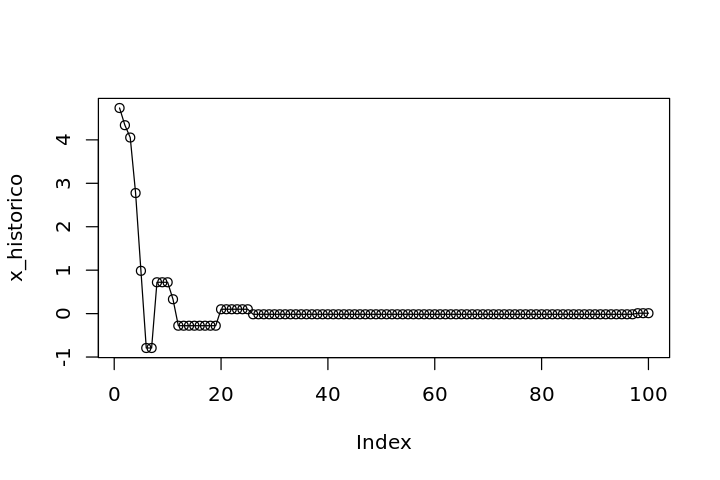

In [2]:
x_0 <- runif(1,-10,10)
hiperparametro <- 2

x_historico <- c()
for (i in 1:100){
    x_new <- rnorm(1,mean=x_0,sd= hiperparametro )
    if (myfunc(x_new) < myfunc(x_0)){
        x_0 <- x_new
    }
    x_historico<-c(x_historico,x_0)
}
plot(x_historico,t="o")
x_0

### Ejemplo 2:

```
1. x_0 <- Asignamos un valor x al azar
2. x_new1 <- x_0 + delta
3. x_new2 <- x_0 - delta
4. Si f(x_new1)<f(x_0) entonces x_0 <- x_new1 
      sino  si f(x_new2)<f(x_0) entonces x_0 <- x_new2
      sino FIN, el minimo esta cerca de x_0
5. Repetimos desde 2 un número N de veces
```

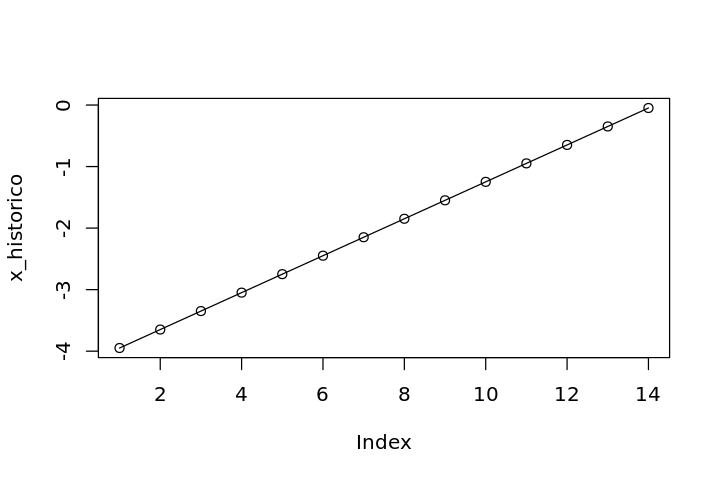

In [3]:
set.seed(123)
x_0 <- runif(1,-10,10)
delta <- 0.3
x_historico<-c()
for (i in 1:100){
    x_new1 <- x_0 + delta
    x_new2 <- x_0 - delta

    if (myfunc(x_new1) < myfunc(x_0)){
        x_0 <- x_new1
    }else if (myfunc(x_new2) < myfunc(x_0)){
        x_0 <- x_new2
    }else{
        break;
    }
    x_historico<-c(x_historico,x_0)
}
plot(x_historico,t='o')

## Derivada

La derivada de una función es su pendiente:
\\[
    f'(x)=\frac{\partial f(x)}{\partial x} = \lim\limits_{h \to 0}\frac{f(x+h)-f(x)}{h}
\\]
En nuestra función $f(x)=x^2+3$ la derivada sería:

\\[
    f'(x) = \lim\limits_{h \to 0}\frac{(x+h)^2 + 3 - x^2 - 3}{h}
\\]

\\[
    f'(x) = \lim\limits_{h \to 0}\frac{ x^2 + h^2 + 2xh - x^2}{h}
\\]

\\[
    f'(x) = \lim\limits_{h \to 0}\frac{  h^2 + 2xh}{h} = 2x
\\]

In [4]:
# ¿Cómo de pequeño tiene que ser h?
x<-5
for (h in c(1,0.5,0.1,0.01,1e-3,1e-4,1e-5)){
    d<-(myfunc(x+h)-myfunc(x))/h
    print(paste("Valor h",h,"--- valor derivada",d))
}

[1] "Valor h 1 --- valor derivada 11"
[1] "Valor h 0.5 --- valor derivada 10.5"
[1] "Valor h 0.1 --- valor derivada 10.1"
[1] "Valor h 0.01 --- valor derivada 10.0099999999998"
[1] "Valor h 0.001 --- valor derivada 10.0010000000026"
[1] "Valor h 1e-04 --- valor derivada 10.000099999985"
[1] "Valor h 1e-05 --- valor derivada 10.0000099994446"


Podemos pintar la derivada junto con la función

La derivada es $f'(x)=2x$, lo que hacemos es pintar una recta $y = a·x+b$.
Sabemos que la pendiente es $f'(x)=a=2x$. Lo centramos en $f(x)$, así que $b=f(x)$ y dibujamos la recta desde $[x-delta,x+delta]$ para:
* $x = -7$ : $f'(x)=-14$ y   $f(x)=52$
* $x = 0$ : $f'(x)=0$ y   $f(x)=3$
* $x = 5$ : $f'(x)=5$ y   $f(x)=28$

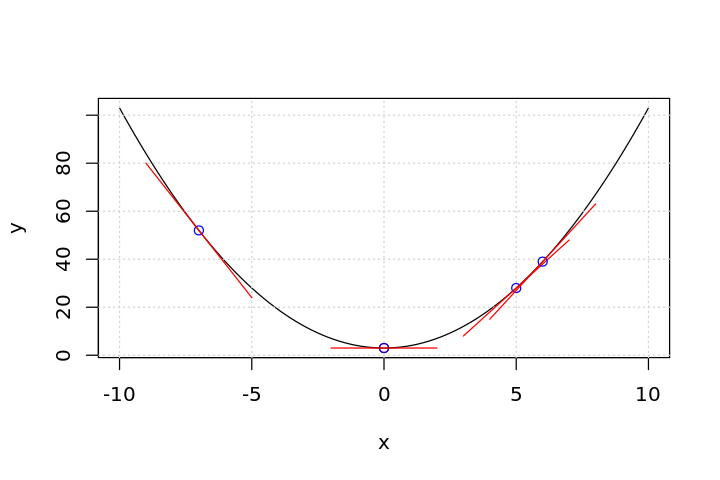

In [5]:
# pintemos las derivadas!
x<-seq(-10,10,length.out = 100)
y<-myfunc(x)

plot(x,y,t="l")
points(0,3,col="red")
grid()

plotDerivada<-function(x){
    points(x,myfunc(x),col="blue")
    delta<-2
    lines(c(x-delta,x+delta),c(myfunc(x)-delta*2*x,myfunc(x)+delta*2*x),col="red")    
}
plotDerivada(5)
plotDerivada(-7)
plotDerivada(0)
plotDerivada(6)

La derivada tiene un valor:
* $f'(x)<0$: **negativo** cuando la función disminuye a medida que aumenta x
* $f'(x)>0$: **positivo** cuando la función aumenta a medida que aumenta x
* $f'(x)=0$: cuando estamos en un máximo, **mínimo** o punto de inflexión

Cuanto mayor es el **valor absoluto** de la derivada, mayor es la pendiente de la función, más rápidamente cambia la función.

**¿Como podemos diferenciar entre máximo, mínimo y punto de inflexión?**

La **segunda derivada**, es decir, la derivada de la derivada nos da información de cómo cambia la derivada. 
\\[
f'' \left(x \right) = \frac{\partial }{\partial x}f' \left(x \right) =\frac{\partial }{\partial x \partial x}f \left(x \right) 
\\]

* $f''(x) > 0$ : Indica que $f'(x)$ va a aumentar al incrementar $x$.  Si $f'(x)=0$ nos encontramos en un mínimo.
* $f''(x) < 0$ : Indica que $f'(x)$ va a disminuir al incrementar $x$. Si $f'(x)=0$ nos encontramos en un máximo.
* $f''(x) = 0$ : Indica que $f'(x)$ va a seguir igual al incrementar $x$. Si $f'(x)=0$ nos encontramos en un punto de inflexión.

La segunda derivada es un elemento que podemos usar para saber si estamos en un máximo, un mínimo o un punto de inflexión.



Ahora podemos modificar el ejemplo 2 utilizando lo que hemos aprendido de derivadas:
```
1. x_0 <- Asignamos un valor x al azar
2. x_new <- x_0 - f'(x_0)*delta
3. Repetimos desde 2 un número N de veces
```

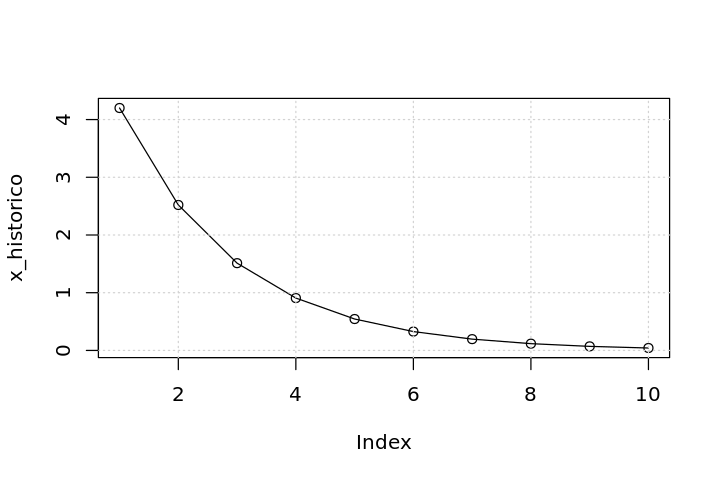

In [6]:
derivada_myfunc<-function(x){2*x}

x_0 <- 7
delta <- 0.2
x_historico<-c()
for (i in 1:10){
    x_0 <- x_0 - derivada_myfunc(x_0)*delta        
    x_historico<-c(x_historico,x_0)
}
plot(x_historico,t='o')
grid()

**Problema: **
Muchas veces no tenemos una función conocida, solo una *caja negra*. ¿Cómo podemos calcular su derivada?


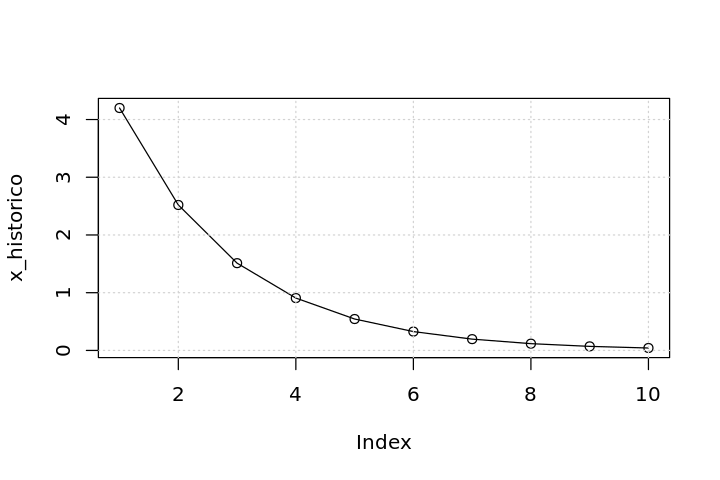

In [7]:

derivada_myfunc<-function(x,h,func){ (func(x+h)-func(x))/h }

x_0 <- 7
delta <- 0.2
h<-0.001
x_historico<-c()

for (i in 1:10){
    x_0 <- x_0 - derivada_myfunc(x_0,h,myfunc)*delta        
    x_historico<-c(x_historico,x_0)
}
plot(x_historico,t='o')
grid()

### Criterio de convergencia

Hasta ahora habíamos ejecutado nuestro algoritmo un número N de iteraciones pero deberíamos parar cuando la función converge al mínimo. A la hora de definir el criterio de convergencia hay que tener en cuenta:
* Si es demasiado restrictivo es posible que nunca se llegue.
* Si es demasiado laxo no conseguiremos optimizar todo lo posible.

Existen varias formas de definirlo:
* Si tras M iteraciones no se consigue disminuir el valor de la función a optimizar.
* Si la derivada es practicamente 0.

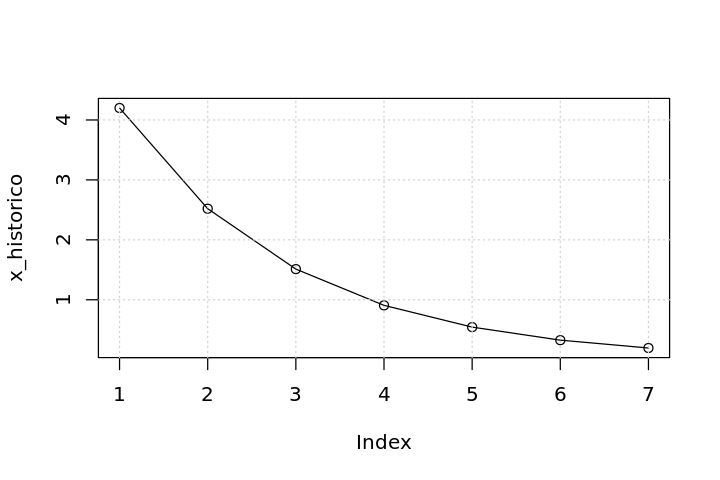

In [8]:
derivada_myfunc<-function(x,h,func){ (func(x+h)-func(x))/h }

x_0 <- 7
delta <- 0.2
h<-0.001
x_historico<-c()
criterio_convergencia<-0.05

for (i in 1:100){
    x_new <- x_0 - derivada_myfunc(x_0,h,myfunc)*delta
    if (abs(myfunc(x_new)-myfunc(x_0))<criterio_convergencia){        
        break;
    }
    x_0<-x_new
    x_historico<-c(x_historico,x_0)
}
plot(x_historico,t='o')
grid()

### Mínimo local vs Minimo global

Las funciones que trataremos de minimizar en *Machine Learning* no suelen ser funciones convexas como la que hemos visto,  suelen tener varios mínimos locales. 

Es imposible garantizar que nuestro algoritmo de optimización acabará en un mínimo global, pero por lo menos nos tenemos que asegurar que cae en un mínimo local con un valor lo suficientemente cercano al del mínimo global.


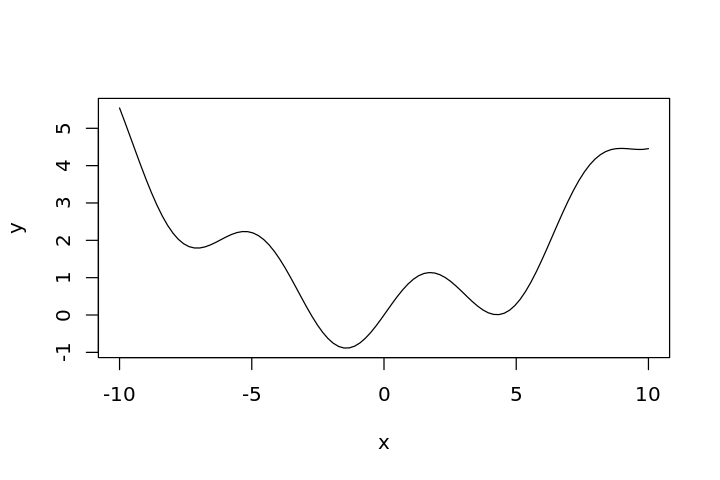

In [9]:
myfunc2<-function(x){0.05*x^2+sin(x)}
x<-seq(-10,10,length.out = 100)
y<-myfunc2(x)
plot(x,y,t="l")

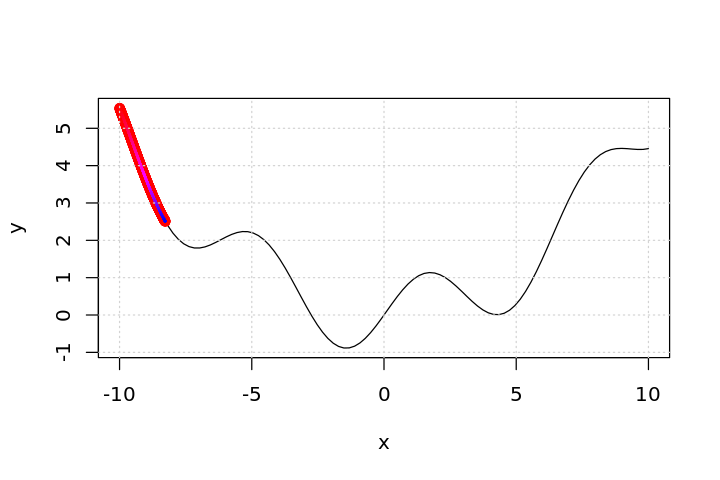

In [10]:
derivada_myfunc<-function(x,h,func){ (func(x+h)-func(x))/h }

x_0 <- -10
delta <- 0.001
h<-0.001
x_historico<-c()
criterio_convergencia<-0.0005

for (i in 1:1000){
    x_new <- x_0 - derivada_myfunc(x_0,h,myfunc2)*delta
    if (abs(myfunc2(x_new)-myfunc2(x_0))<criterio_convergencia){        
        break;
    }
    x_0<-x_new
    x_historico<-c(x_historico,x_0)
}

library(plotrix)
plot(x,y,t="l")
points(x_historico,myfunc2(x_historico),col="red")
color.scale.lines(x_historico,myfunc2(x_historico),
                  c(1,1,0),0,c(0,1,1),colvar=1:length(x_historico),lwd=2)


grid()

### Espacio vectorial

La mayor parte de las funciones a optimizar no toman como entrada no un escalar sino un vector. En este caso el vector definirá un expacio en el cual habrá que encontrar el valor que produzca el mínimo valor.

Hasta ahora hemos visto la derivada de una función. Ahora vamos a introducir el concepto de derivada parcial:

Sea una función $f: \mathbb {R}^n \rightarrow  \mathbb {R}$ la derivada parcial $\frac{\partial }{\partial x_i}f \left(\vec{x} \right)$ mide como cambia $f \left(\vec{x} \right)$ en función de la variable $x_i$, esto es la columna *i-ésima* del vector $\vec{x}$.

Por ejemplo:
\\[
f(x_1,x_2)=x_1^2+3*x_2^2
\\]

La derivada parcial respecto a $x_1$ es: $\frac{\partial }{\partial x_1}f \left(\vec{x} \right) = 2x_1$

La derivada parcial respecto a $x_2$ es: $\frac{\partial }{\partial x_2}f \left(\vec{x} \right) = 6x_2$


El **gradiente** es la derivada respecto al vector $\vec{x}$, es una generalización multivariable de la derivada. Se denota con el símbolo $\nabla f$. El resultado es un vector, a diferencia de la derivada cuyo resultado es un escalar.
\\[
\nabla f(x_1,x_2)=2x_1·\vec{u}+6*x_2·\vec{v}
\\]
Donde $\vec{u}$ y $\vec{v}$ son los vectores unitarios de las coordenadas dadas por $x_1$ y $x_2$ respectivamente.

El gradiente indica la dirección de máximo crecimiento de la función, y su valor negativo indica la dirección de máximo de crecimiento.

Así pues el **método de descenso de gradientes** se basa en encontrar la dirección de máximo decrecimiento de la función y actualizar el valor de $\vec{x}$ en conformidad.
\\[
\vec{x}_{new} = \vec{x}-\epsilon \nabla f \left(\vec{x} \right)
\\]

Donde $\epsilon$ es una constante, un hiperparámetro, que hay que definir al principio de la iteración. Se le conoce como **tasa de aprendizaje** (learning rate). Un valor pequeño puede hacer que se necesiten muchas iteraciones para converger, una valor grande puede hacernos perder el máximo de la función.

El método de descenso de gradientes converge cuando todos los elemenos del gradiente son cero (o muy próximos a cero).

El método de descenso de gradientes se considera un algoritmo de **primer orden** porque utiliza información solo de la primera derivada. Nunca utiliza información de la segunda derivada.

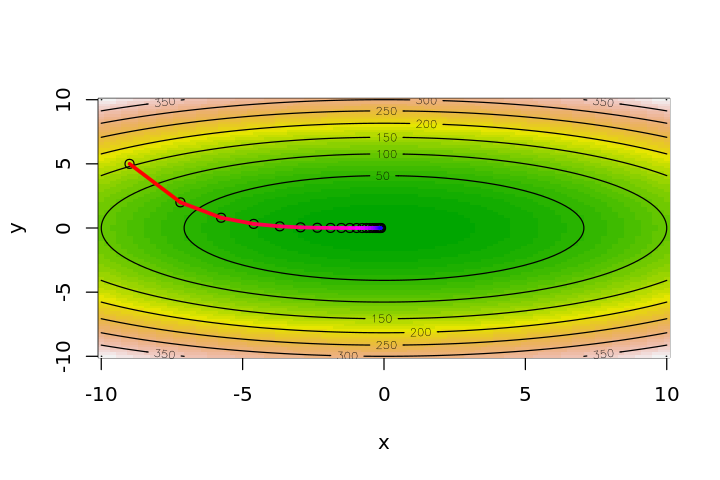

In [11]:
myfunc3D<-function(x1,x2){x1^2+3*x2^2}


myfuncVector<-function(x){x[1]^2+3*x[2]^2}
mygradient<-function(x,h,func){
    c((func(c(x[1]+h,x[2]))-func(c(x[1],x[2])))/h,
      (func(c(x[1],x[2]+h))-func(c(x[1],x[2])))/h
    )
}



x <- seq(-10,10,length=100)
y <- seq(-10,10,length=100)
z <- outer(x,y,myfunc3D)
image(x,y,z,col = terrain.colors(39))
contour(x,y,z,add=T)


x_0<-c(-9,5)
delta<- 0.1
h<-0.001
criterio_convergencia<-0.05

x_historico<-data.frame(x=x_0[1],y=x_0[2])
for (i in 1:100){
    g<-mygradient(x_0,h,myfuncVector)
    if (sum(g^2)<criterio_convergencia){
        break;
    }
    x_new <- x_0 - delta*g
    x_0 <- x_new
    x_historico<- rbind(x_historico,data.frame(x=x_0[1],y=x_0[2]))        
}

points(x_historico$x,x_historico$y,col="black")
color.scale.lines(x_historico$x,x_historico$y,c(1,1,0),0,c(0,1,1),colvar=1:nrow(x_historico),lwd=3)




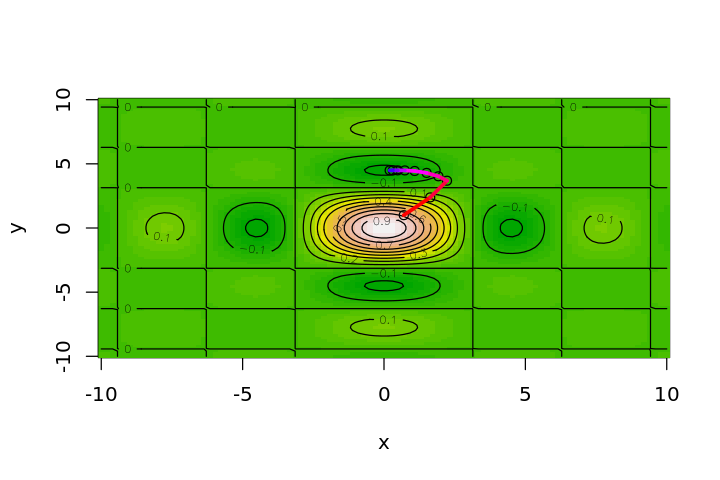

In [12]:
myfunc3D<-function(x1,x2){sin(x1)*sin(x2)/(x1*x2)}
x <- seq(-10,10,length=100)
y <- seq(-10,10,length=100)
z <- outer(x,y,myfunc3D)
image(x,y,z,col = terrain.colors(39))
contour(x,y,z,add=T)


myfuncVector<-function(x){ myfunc3D(x[1],x[2]) }

x_0<-c(0.7,1)
delta<- 5
h<-0.001
criterio_convergencia<-0.0005

x_historico<-data.frame(x=x_0[1],y=x_0[2])
for (i in 1:100){
    g<-mygradient(x_0,h,myfuncVector)
    if (sum(g^2)<criterio_convergencia){
        break;
    }
    x_new <- x_0 - delta*g
    x_0 <- x_new
    x_historico<- rbind(x_historico,data.frame(x=x_0[1],y=x_0[2]))        
}

points(x_historico$x,x_historico$y,col="black")
color.scale.lines(x_historico$x,x_historico$y,c(1,1,0),0,c(0,1,1),colvar=1:nrow(x_historico),lwd=3)

### Método de Newton

El método de Newton es un método utilizado para encontrar, de forma iterativa, la raíz de una función.


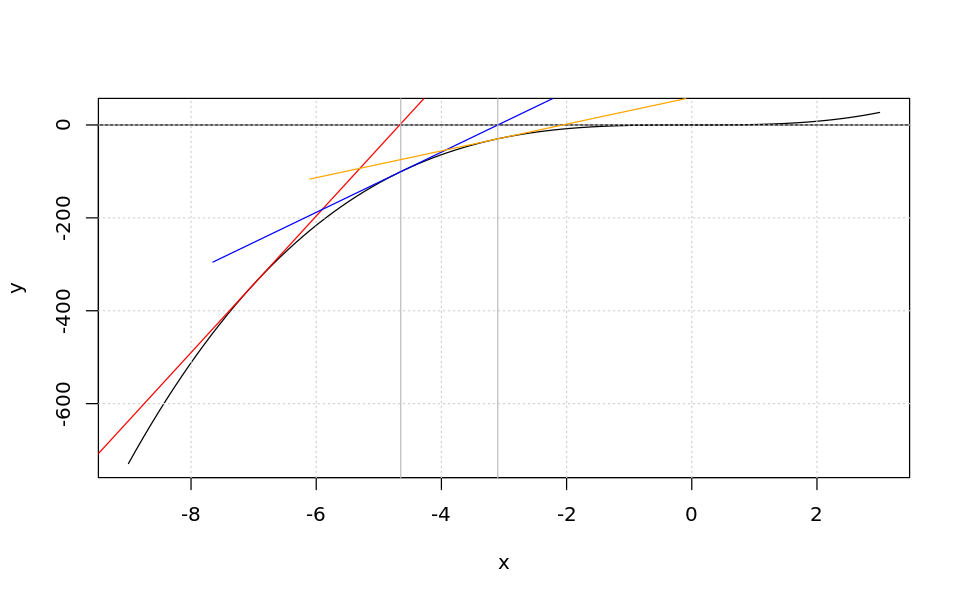

In [13]:
f_x<-function(x){x^3}

x<-seq(-9,3,length.out = 100)
y<-f_x(x)

options(repr.plot.height=4,repr.plot.width=6)
plot(x,y,t="l")
abline(h=0)
grid()
options(repr.plot.height=5,repr.plot.width=8)


plotDerivada<-function(x,color="red"){
    delta <- 3
    lines(c(x-delta,x+delta),
          c(f_x(x)-delta*3*x^2,f_x(x)+delta*3*x^2),
          col=color)
}
plotDerivada(-7)
abline(v=-4.65,col="gray")
plotDerivada(-4.65,color="blue")
abline(v=-3.1,col="gray")
plotDerivada(-3.1,color="orange")


Este método iterativo aproxima el valor de la función a 0 siguiendo los siguientes pasos:
1. Selecciona un punto inicial: $x_0$
1. Traza una línea tangente a la curva, es decir, con pendiente igual a la derivada.
1. Proyectar la línea anterior hasta que corte en $y=0$. El valor de $x$ donde corta será el nuevo $x_0$
1. Repetir desde el paso 2 hasta que $f(x_0)$ sea muy cercano a 0.

Estos pasos se pueden simplificar de la siguiente forma:

Podemos aproximar la functión $f(x)$ en un punto $x$ cercano a $x_0$ de la siguiente forma. Esto se considera una aproximación al desarrollo en serie de Taylor solo con la primera derivada:
\\[
f(x) \approx  f(x_0)+(x-x_0)·f'(x_0)
\\]

Si igualamos $f(x)=0$ y despejamos $x$:
\\[
\begin{split}
0 &= f(x_0)+(x-x_0)·f'(x_0) \\
0 &= f(x_0)+x·f'(x_0)-x_0·f'(x_0) \\
x_0·f'(x_0) - f(x_0) &= x·f'(x_0) \\
x_0 - \frac{f(x_0)}{f'(x_0)} &= x \\
\end{split}
\\]

Encontrar el mínimo de una función equivale a encontrar la raiz de su derivada. Es decir, el mínimo siempre se encuentra en $f'(x)=0$. Por lo tanto podemos usar el método de Newton para encontrar el mínimo de una función. Solo hay que reemplazar $f(x)$ por $f'(x)$:
\\[
x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)}
\\]
Aplicamos de forma iterativa esa ecuación hasta que alcanzamos un mínimo. 

### Método de Newton en optimización

Para poder usar el método de Newton en optimización tenemos que generalizarlo a un espacio vectorial. 

#### Matriz Jacobiana

Es la generalización del concepto **derivada** aplicada a funciones de vectores. 


Supongamos que tenemos una función $f: \mathbb {R}^n \rightarrow  \mathbb {R}$.
En este caso el Jacobiano coincide con el gradiente: 
\\[
{\boldsymbol  \nabla }f({\vec {x}})={\begin{bmatrix}{\cfrac  {\partial y}{\partial x_{1}}}&\ldots &{\cfrac  {\partial y}{\partial x_{n}}}\end{bmatrix}}
\\]

Si tenemos una función $f: \mathbb {R}^n \rightarrow  \mathbb {R}^m$ el Jacobiano es la derivada parcial de todas las posibles combinaciones de coordenadas.
\\[
J_{\mathbf {f} }(x_{1},\ldots ,x_{n}) = {\begin{bmatrix}{\cfrac  {\partial y_{1}}{\partial x_{1}}}&\cdots &{\cfrac  {\partial y_{1}}{\partial x_{n}}}\\\vdots &\ddots &\vdots \\{\cfrac  {\partial y_{m}}{\partial x_{1}}}&\cdots &{\cfrac  {\partial y_{m}}{\partial x_{n}}}\end{bmatrix}}
\\]

#### Matriz Hessiana

Es la generalización del concepto **derivada segunda** aplicada a funciones de vectores. 

Dada una función $f: \mathbb {R}^n \rightarrow  \mathbb {R}$, la segunda derivada respecto a $x_i$ y $x_j$ es 
${\frac  {\partial ^{2}}{\partial x_{i}\,\partial x_{j}}}f \left(\vec{x}\right)$. Es decir:

\\[
H_{{f}}\left(\vec{x}\right)_{{i,j}}={\frac  {\partial ^{2}}{\partial x_{i}\,\partial x_{j}}}f \left(\vec{x}\right).
\\]

Esto se convierte en una matriz de la siguiente forma:
\\[
H(f)=\begin{bmatrix}{\frac  {\partial ^{2}f}{\partial x_{1}^{2}}}&{\frac  {\partial ^{2}f}{\partial x_{1}\partial x_{2}}}&\cdots &{\frac  {\partial ^{2}f}{\partial x_{1}\partial x_{n}}}\\{\frac  {\partial ^{2}f}{\partial x_{2}\partial x_{1}}}&{\frac  {\partial ^{2}f}{\partial x_{2}^{2}}}&\cdots &{\frac  {\partial ^{2}f}{\partial x_{2}\partial x_{n}}}\\\vdots &\vdots &\ddots &\vdots \\{\frac  {\partial ^{2}f}{\partial x_{n}\partial x_{1}}}&{\frac  {\partial ^{2}f}{\partial x_{n}\partial x_{2}}}&\cdots &{\frac  {\partial ^{2}f}{\partial x_{n}^{2}}}
\end{bmatrix}
\\]

La matriz **Hessiana** es el **Jacobiano** del gradiente.

**Ejemplo**:
\\[
f(x_1,x_2)=x_1^2+x_2^3
\\]
Sabemos que:
\\[
\begin{split}
\frac{\partial f(x_1,x_2)}{\partial x_1} &= 2·x_1 \\
\frac{\partial f(x_1,x_2)}{\partial x_2} &= 3·x_2^2
\end{split}
\\]

Su matriz Hessiana se calcula como:
\\[
\begin{split}
\frac{\partial f(x_1,x_2)}{\partial x_1 \partial x_1} &= 2 \\
\frac{\partial f(x_1,x_2)}{\partial x_1 \partial x_2} &= 0 \\
\frac{\partial f(x_1,x_2)}{\partial x_2 \partial x_1} &= 0 \\
\frac{\partial f(x_1,x_2)}{\partial x_2 \partial x_2} &= 6·x_2 
\end{split}
\\]

El resultado es:
\\[
H(f_\vec{x})=\begin{bmatrix} 
2 & 0 \\
0 & 6·x_2
\end{bmatrix}
\\]


### Método de Newton

La ecuación:
\\[
x = x_0 - \frac{f'(x_0)}{f''(x_0)}
\\]
la podemos generalizar reemplazando $f'(x)$ con el gradiente y $f''(x)$ con la matriz Hessiana.

\\[
\vec x = \vec x_0 - [\mathbf {H} f\left(\vec {x}_0 \right)]^{-1}·\nabla f(\mathbf {x}_0)
\\]

Podemos añadir una tasa de aprendizaje (learning rate) $\epsilon$, un hiperparámetro, que hay que definir al principio de la iteración. Se le conoce como **tasa de aprendizaje** (learning rate). Un valor pequeño puede hacer que se necesiten muchas iteraciones para converger, una valor grande puede hacernos perder el máximo de la función.


\\[
\vec x = \vec x_0 - \epsilon [\mathbf {H} f\left(\vec {x}_0 \right)]^{-1}·\nabla f(\mathbf {x}_0)
\\]


**Ejemplo en R**

En R podemos usar el paquete *pracma* que tiene las funciones *grad()* y *hessian()* para calcular el gradiente y la matriz Hessiana.

Por ejemplo, vamos a calcular en R el gradiente y la matriz Hessiana de $f(x_1,x_2)=x_1^2+x_2^3$, en el punto $[2,1]$ que sabemos que es:
\\[
\nabla (f_\vec{x})=\begin{bmatrix} 
2·x_1 & 3·x_2^2 \\
\end{bmatrix} =
\begin{bmatrix} 
4 & 3 \\
\end{bmatrix} 
\\]
\\[
H(f_\vec{x})=\begin{bmatrix} 
2 & 0 \\
0 & 6·x_2
\end{bmatrix}
=\begin{bmatrix} 
2 & 0 \\
0 & 6
\end{bmatrix}
\\]


In [14]:
library(pracma)
f_x1x2<-function(x){x[1]^2+x[2]^3}
xvec<-c(2,1)
print("El gradiente es:")
grad(f_x1x2,xvec)
print("La matriz Hessiana es:")
hessian(f_x1x2,xvec)

[1] "El gradiente es:"


[1] 4 3

[1] "La matriz Hessiana es:"


2,0
0,6


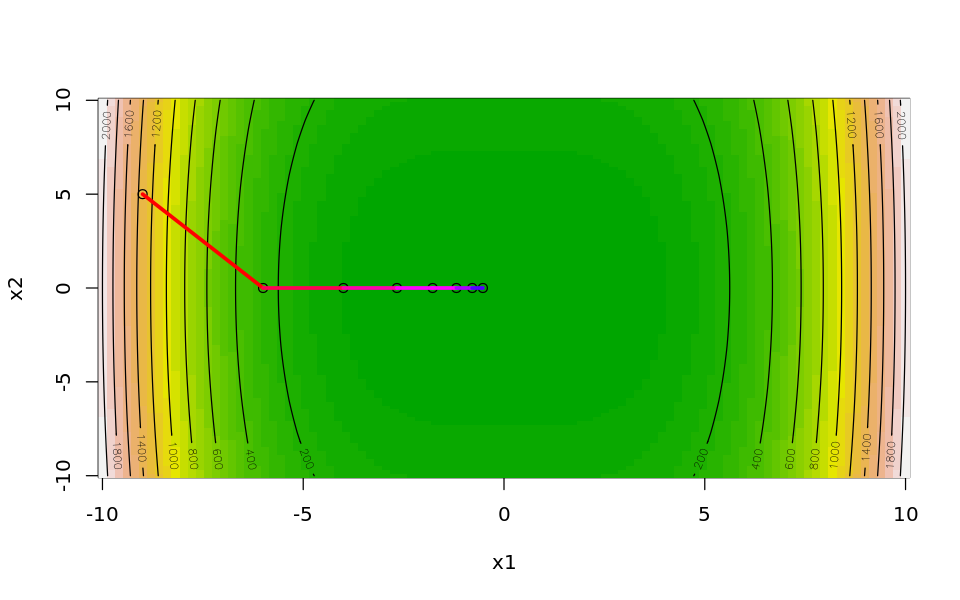

In [15]:
library(pracma)
library(plotrix)
myfunc3D<-function(x1,x2){0.2*x1^4+x2^2}

myfuncVector<-function(x){ myfunc3D(x[1],x[2])  }



x1 <- seq(-10,10,length=100)
x2 <- seq(-10,10,length=100)
z <- outer(x1,x2,myfunc3D)
image(x1,x2,z,col = terrain.colors(39))
contour(x1,x2,z,add=T)



x_0<-c(-9,5)
delta<- 1
h<-0.001
criterio_convergencia<-0.05

x_historico<-data.frame(x=x_0[1],y=x_0[2])
for (i in 1:100){
    #g<-mygradient(x_0,h,myfuncVector)
    g<-inv(hessian(myfuncVector,x_0)) %*% as.matrix(grad(myfuncVector,x_0),cols=1)
    if (sum(g^2)<criterio_convergencia){
        break;
    }
    x_new <- x_0 - delta*g
    x_0 <- x_new
    x_historico<- rbind(x_historico,data.frame(x=x_0[1],y=x_0[2]))        
}

points(x_historico$x,x_historico$y,col="black")
color.scale.lines(x_historico$x,x_historico$y,c(1,1,0),0,c(0,1,1),colvar=1:nrow(x_historico),lwd=3)

#### Problemas del método de Newton

* El calcular la matriz Hessiana es costoso computacionalmente hablando.
* Cuando la función es convexa y cuadrática converge en un solo salto, si no es cuadrática hacen falta más iteraciones.
* Es útil solo cuando el punto crítico cercano es un mínimo.

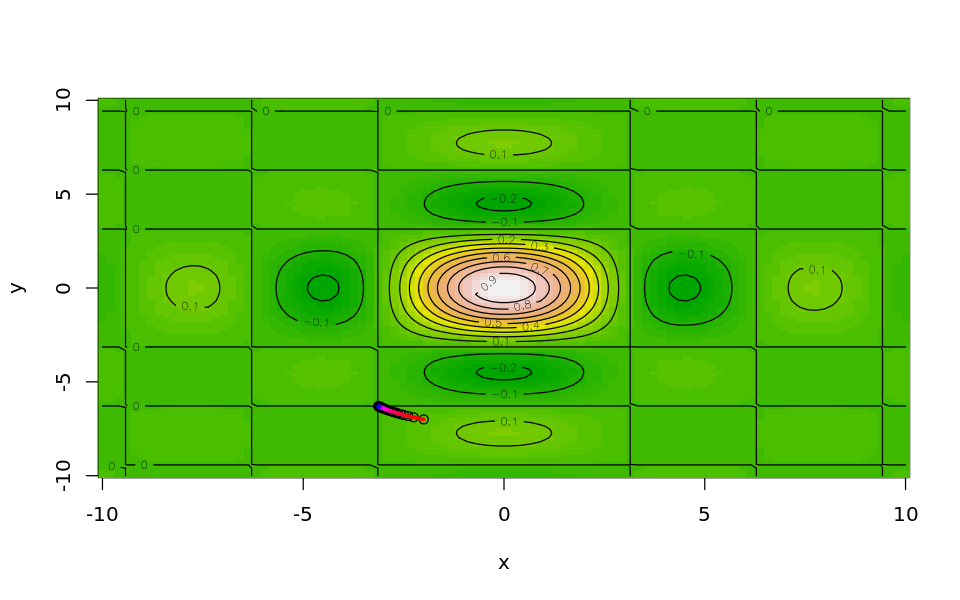

In [16]:
library(pracma)
library(plotrix)
myfunc3D<-function(x1,x2){sin(x1)*sin(x2)/(x1*x2)}
x <- seq(-10,10,length=100)
y <- seq(-10,10,length=100)
z <- outer(x,y,myfunc3D)
image(x,y,z,col = terrain.colors(39))
contour(x,y,z,add=T)


myfuncVector<-function(x){ myfunc3D(x[1],x[2]) }

x_0<-c(-2,-7)
delta<- 0.1
h<-0.001
criterio_convergencia<-0.0005

x_historico<-data.frame(x=x_0[1],y=x_0[2])
for (i in 1:100){
    #g<-grad(myfuncVector,x_0)
    g<-inv(hessian(myfuncVector,x_0)) %*% as.matrix(grad(myfuncVector,x_0),cols=1)
    if (sum(g^2)<criterio_convergencia){
        break;
    }
    x_new <- x_0 - delta*g
    x_0 <- x_new
    x_historico<- rbind(x_historico,data.frame(x=x_0[1],y=x_0[2]))        
}

points(x_historico$x,x_historico$y,col="black")
color.scale.lines(x_historico$x,x_historico$y,c(1,1,0),0,c(0,1,1),colvar=1:nrow(x_historico),lwd=3)

# Regresión lineal

## Regresión lineal simple

Modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente $Y$, la variables independiente $X$ y un término aleatorio $\varepsilon$. Este modelo puede ser expresado como:

\\[
y_i=\beta_0+\beta_1 x_i+\varepsilon_i  \quad \text{para }i=1,\dots,n
\\]

(Intercept)           x 
   1.769291   19.757105

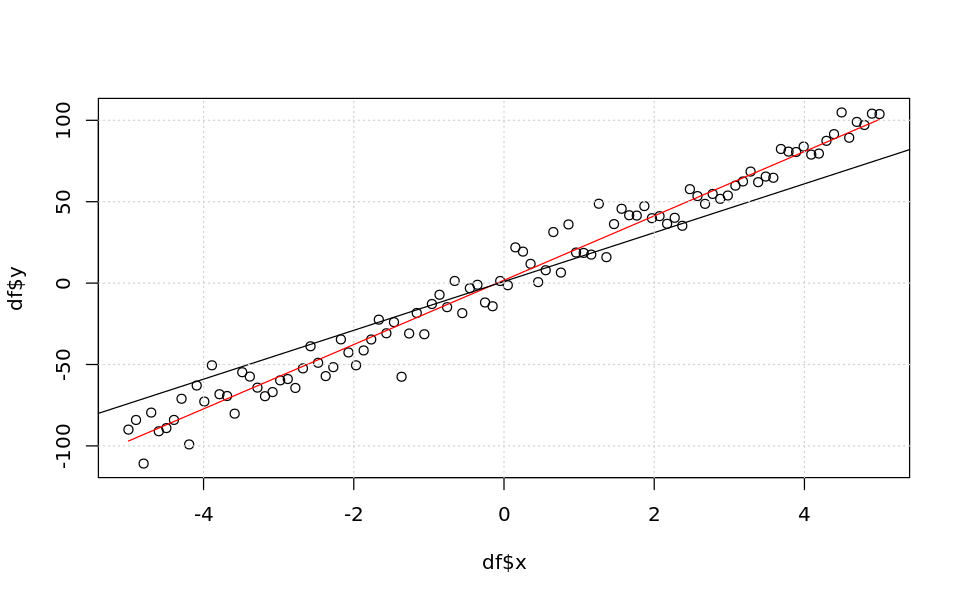

In [17]:
n<-100
x<-seq(-5,5,length.out = n)
df<-data.frame(x,y = 20*x+1+rnorm(n,mean=1,sd=10))
model <- lm(y~x,data=df)
model$coefficients

plot(df$x,df$y)
lines(df$x,predict(model,df),col="red")
abline(c(1,15))
grid()


Esto significa que se puede expandir de la forma:
\\[
\begin{split}
y_1 &=\beta_0+\beta_1 x_1+\varepsilon_1  \\
y_2 &=\beta_0+\beta_1 x_2+\varepsilon_2  \\
\vdots& \\
y_n&=\beta_0+\beta_1 x_n+\varepsilon_n 
\end{split}
\\]


donde:
* $y_i$: i-esimo valor de la variable dependiente
* $x_i$: i-esimo valor de la variable independiente
* $\beta_0, \beta_1$: parámetros a determinal que dado un conjunto de $x_i$ produce los mejores $y_i$
 * $\beta_0$ : Puede ser llamado sesgo, bias, intercept o término constante. Indica el corte en el eje Y
 * $\beta_1$ : Puede ser llamado pendiente, slope. Indica cuanto aumenta Y por cada incremento de X
* $\varepsilon_i$: error, valor aleatorio.

Podemos escribirlo en forma de matriz:
\\[
\begin{bmatrix}
 y_1 \\ 
 y_2 \\ 
 \vdots \\ 
 y_n 
\end{bmatrix}
=
\begin{bmatrix}
 1 & x_1\\ 
 1 & x_2 \\ 
 \vdots & \vdots \\ 
 1 & x_n 
\end{bmatrix}
\begin{bmatrix}
\beta_0
\\ 
\beta_1
\end{bmatrix}+
\begin{bmatrix}
 \varepsilon_1 \\ 
 \varepsilon_2 \\ 
 \vdots \\ 
 \varepsilon_n
\end{bmatrix}
\\]
Lo que se puede simplificar como:
\\[
Y=X \beta+\varepsilon
\\]




Donde:
* $Y \in \mathbb{R}^{n \times 1}$ 
* $X \in \mathbb{R}^{n \times 2}$ 
* $\beta \in \mathbb{R}^{1 \times 2}$ 
* $\varepsilon \in \mathbb{R}^{n \times 1}$ 



Podemos usar la matriz inversa para resolver ecuaciones:
\\[
\begin{split}
Y &= X \beta \\
X^{-1}Y&=X^{-1}X \beta \\
X^{-1}Y&=I\beta \\
X^{-1}Y&=\beta \\
\end{split}
\\]


### Pseudoinversa Moore-Penrose

¿Qué ocurre si la matriz que queremos invertir no es cuadrada? Entonces el sistema de ecuaciones no tiene una única solución o simplemente no tiene solución.

Lo que tratamos de encontrar es la menos mala de las soluciones.

Para números reales se define como:
\\[
X^+ = \left( X^{\intercal} X  \right)^{-1} X^{\intercal}
\\]
Cuando:
\\[
X^+X = I
\\]



El problema original consistía en querer calcular $\beta$ de tal forma que se minimice la influencia de $\varepsilon$:
\\[
Y=X \beta+\varepsilon
\\]
En nuestro sistema $\varepsilon$ es desconocido, pero sabemos que tiene media cero y varianza finita. Así que  simplificamos el siguiente sistema de ecuaciones:

\\[
\begin{split}
Y=&X \hat{\beta} \\
X^+Y=& X^+X \hat{\beta} \\
X^+Y=& \hat{\beta} \\
X^+Y=& \hat{\beta} \\
\left( X^{\intercal}X  \right)^{-1} X^{\intercal} Y =& \hat{\beta}
\end{split}
\\]

Ahora tenemos, a partir de $X$ e $Y$ una estimación $\hat{\beta}$. Podemos entonces, a partir de valores conocidos de $X$ calcular una estimación de $\hat{Y}$. 
\\[
\hat{Y}=X \hat{\beta}
\\]

Evidentemente $Y \neq \hat{Y}$, llamaremos **residuo**(error) a la diferencia entre el valor real y el valor estimado : $Y-\hat{Y}$. 

El método anterior garantiza que el error cuadrático medio sea mínimo.
\\[
MSE = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}
\\]

Es decir, nuestra tarea consiste en **minimizar** la función $MSE$ para que nuestro modelo $\hat{Y}$ sea **óptimo**. La función MSE es convexa y cuadrática.

#### Coeficiente de determinación $R^2$


Proporciona una medida de como de bien nuestra medida sigue al modelo. Se calcula mediante:
\\[
R^2=1-\frac{SS_{res}}{SS_t}
\\]

Donde $SS_{res}$ es la suma del cuadrado de los residuos:
\\[
SS_{res}=\sum_i (y_i-\hat {y_i})^2
\\]

y $SS_{tot}$ es proporcional a la varianza de $Y$:

\\[
SS_{tot}=\sum_i (y_i-\bar{y})^2
\\]

Cuanto más cercano a $1$ mejor seguirá la predicción a los datos reales.

Vamos a tratar de minimizar la función MSE con lo que hemos aprendido del descenso de gradientes:

,beta0,beta1
101,0.2084528,19.7571


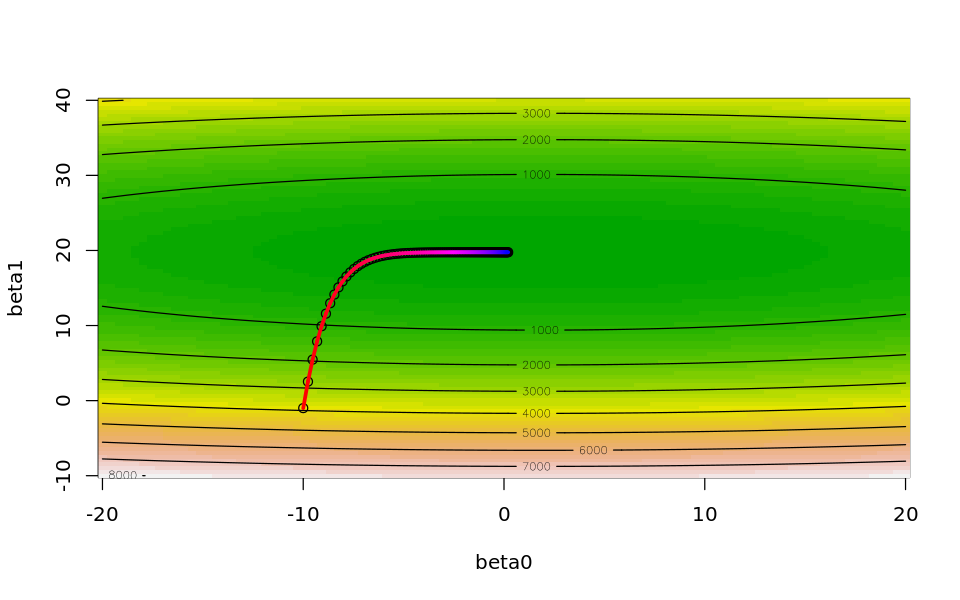

In [18]:
library(pracma)
library(plotrix)

mymodel<-function(x,beta0,beta1){beta0+x*beta1}

mse<-function(beta0,beta1){
    out<-rep(NA,length(beta0))
    for(i in 1:length(beta0)){
        out[i]<-sum((df$y-mymodel(df$x,beta0[i],beta1[i]))^2)/nrow(df)
    }
    out
}

beta0<-seq(-20,20,length=100)
beta1<-seq(-10,40,length=100)
z<-outer(beta0,beta1,mse)
image(beta0,beta1,z,col=terrain.colors(39))
contour(beta0,beta1,z,add=T)

myfuncVector<-function(beta){ mse(beta[1],beta[2])}

x_0<-c(-10,-1)
delta<- 0.01
h<-0.001
criterio_convergencia<-0.0005

x_historico<-data.frame(beta0=x_0[1],beta1=x_0[2])
for (i in 1:100){
    g<-grad(myfuncVector,x_0)
    #g<-inv(hessian(myfuncVector,x_0)) %*% as.matrix(grad(myfuncVector,x_0),cols=1)
    if (sum(g^2)<criterio_convergencia){
        break;
    }
    x_new <- x_0 - delta*g
    x_0 <- x_new
    x_historico<- rbind(x_historico,data.frame(beta0=x_0[1],beta1=x_0[2]))        
}
tail(x_historico,1)
points(x_historico$beta0,x_historico$beta1,col="black")
color.scale.lines(x_historico$beta0,x_historico$beta1,c(1,1,0),0,c(0,1,1),colvar=1:nrow(x_historico),lwd=3)


## Regresión lineal múltiple

Ahora ahora habíamos visto como encontrar como el cambio en una variable puede afectar a otra, pero ¿qué ocurre si son varias las variables que alteran el comportamiento de nuestra variable objetivo? En este caso necesitamos utilizar la regresión lineal múltiple.

Es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente $Y$, las variables independientes $X_i$ y un término aleatorio $\varepsilon$. Este modelo puede ser expresado como:

\\[
Y=\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p+\varepsilon = \sum \beta_k X_k+\varepsilon
\\]


donde:
* $Y$: variable dependiente
* $X_1,X_2,\cdots ,X_p$: variables independientes
* $\beta_0, \beta_1,\beta_2,\cdots ,\beta_p$: parámetros a determinal que dado un $X_k$ produce el mejor posible $Y$
* $\varepsilon$: error, valor aleatorio.

Condiciones para aplicarlo:
1. Que la relación entre las variables sea lineal.
2. Que los errores en la medición de $X_k$ sean independientes entre sí.
3. Que los errores tengan varianza constante.
4. Que los errores tengan una media aritmética igual a cero.


Para calcular el valor óptimo de $\beta$ vamos a utilizar un poco de álgebra linea. 
\\[
\begin{split}
y_1 &=\beta_1 x_{11}+\beta_2 x_{12}+\beta_3 x_{13}+\cdots+\beta_p x_{1p}+\varepsilon_1  \\
y_2 &=\beta_1 x_{21}+\beta_2 x_{22}+\beta_3 x_{23}+\cdots+\beta_p x_{2p}+\varepsilon_1  \\
\vdots& \\
y_n &=\beta_1 x_{n1}+\beta_2 x_{n2}+\beta_3 x_{n3}+\cdots+\beta_p x_{np}+\varepsilon_1  \\
\end{split}
\\]

Podemos escribirlo en forma de matriz:
\\[
\begin{bmatrix}
 y_1 \\ 
 y_2 \\ 
 \vdots \\ 
 y_n 
\end{bmatrix}
=
\begin{bmatrix}
 x_{11} & x_{12} & x_{13} & \cdots & x_{1p} \\ 
 x_{21} & x_{22} & x_{23} & \cdots & x_{2p} \\ 
 \vdots & & & \ddots & \vdots \\ 
 x_{n1} & x_{n2} & x_{n3} & \cdots & x_{np}
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\ 
\beta_2 \\
\beta_3 \\
\vdots  \\
\beta_p
\end{bmatrix}+
\begin{bmatrix}
 \varepsilon_1 \\ 
 \varepsilon_2 \\ 
 \vdots \\ 
 \varepsilon_n
\end{bmatrix}
\\]
Lo que se puede simplificar como:
\\[
Y=X \beta+\varepsilon
\\]

Al igual que en el caso anterior podemos estimar $\beta$ con:
\\[
\beta=\left( X^{\intercal}X  \right)^{-1} X^{\intercal} Y
\\]

(Intercept) poly(x, 3)1 poly(x, 3)2 poly(x, 3)3 
   54.52042   763.19677   619.33385   569.05065

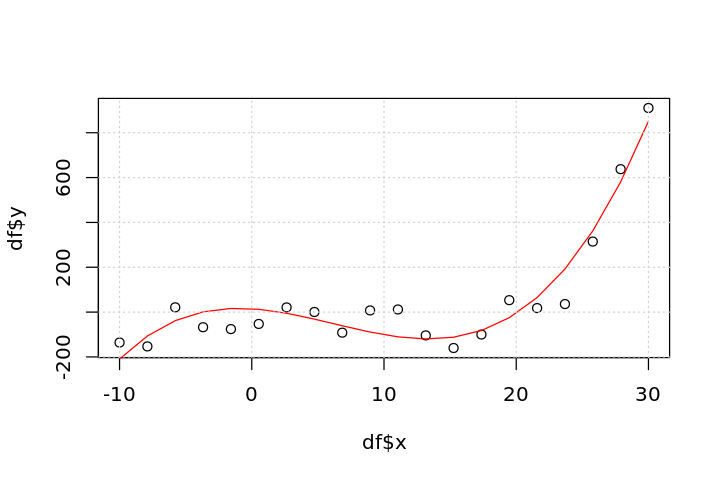

In [19]:
n<-20
x<-seq(-10,30,length.out = n)
df<-data.frame(x,y = x-3*x-2*x^2+0.1*x^3+1+rnorm(n,mean=1,sd=80))
model <- lm(y~poly(x,3),data=df)
model$coef
options(repr.plot.height=4,repr.plot.width=6)

plot(df$x,df$y)
lines(df$x,predict(model,df),col="red")
grid()

Esta fórmula nos garantiza que el error (residuo) cuadrático medio sea mínimo:
\\[
MSE = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}
\\]

Es decir, nuestra tarea consiste en **minimizar** la **función de coste** ($MSE$) para que nuestro modelo $\hat{Y}$ sea **óptimo**.





## Generalización

La habilidad de obtener un resultado en datos no observados se llama **generalización**.

El objetivo en estadística era encontrar un modelo que mejor encajara con los datos observados, era un problema de optimización pura. En *Machine Learning* queremos un modelo para hacer predicciones, eso significa que necesitamos un modelo que funcione lo mejor posible con **datos que no hemos observado nunca**.

Es por ello que los datos se dividen en como mínimo dos grupos:
* Datos de **entrenamiento**: Son los datos con los que entrenaremos nuestro modelo.
* Datos de **test**: Son los datos con los que comprobaremos la calidad de nuestro modelo. Son datos que el modelo no ha visto nunca.

Veamos un ejemplo, supongamos que tenemos los siguientes datos

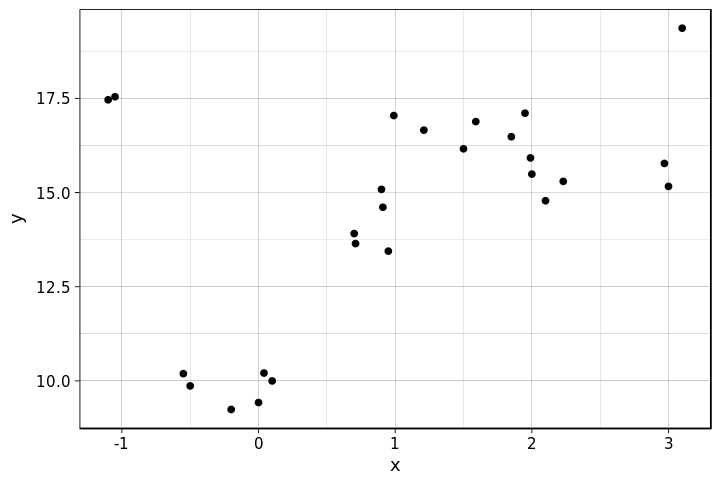

In [20]:
library(ggplot2)
x<-c(-1.1,-1.05,0.99,0.95,-0.5,-0.55,0,0.1,0.7,0.71,0.9,0.91,1.5,1.85,1.95,1.99,2,2.1,3,3.1,-0.20,0.04,1.21,1.59,2.23,2.97)
y<-c(17.462034,17.543560,17.044042,13.444434,9.866625,10.191937,9.425260,9.998468,13.910648,13.645024,15.083907,14.610008,16.161246,16.482340,17.106625,15.919612,15.488990,14.781905,15.162828,19.362935,9.24160,10.20768,16.65628,16.88339,15.29640,15.77241)
data.df<-data.frame(x,y)
ggplot(data.df,aes(x=x,y=y))+geom_point()+theme_linedraw()

Queremos hacer un modelo que dado un valor de X, me de el valor más cercano de Y. Podemos probar con modelos más o menos complejos, con distinto grado:

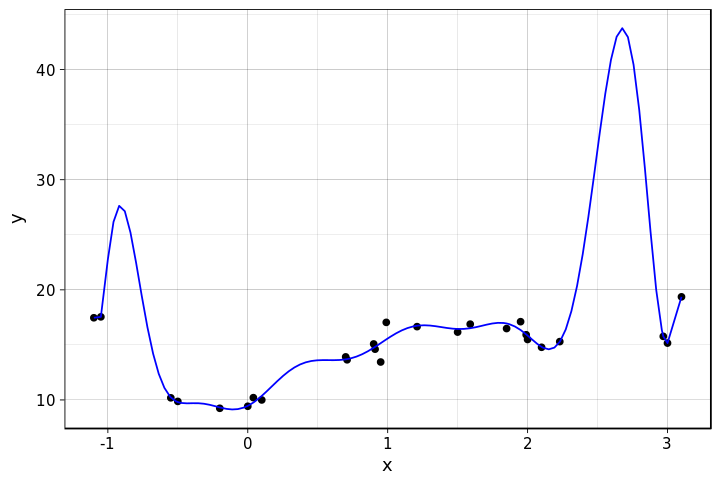

In [21]:
model<-lm(y~poly(x,15),data=data.df)
new.data.df<-data.frame(x=c(data.df$x,seq(-1,3,length.out=100)),y=NA,yp=NA)
new.data.df$yp<-predict(model,new.data.df)

data.df$yp<-predict(model,data.df)

new.data.df<-rbind(new.data.df,data.df)
ggplot(new.data.df,aes(x=x,y=y))+geom_point(na.rm=TRUE)+geom_line(aes(y=yp),color="blue")+theme_linedraw()


Cual de todos los modelos es el mejor? Acordaros que buscamos generalización, queremos que el modelo se comporte lo mejor posible con datos que no ha visto. 
Por ello dividimos nuestros datos entre test y training. Una buena prácita consiste en usar un 70%-80% para entrenamiento y el resto para tests. 
En este caso podemos por ejemplo coger 20 muestras para entrenamiento y el resto para test

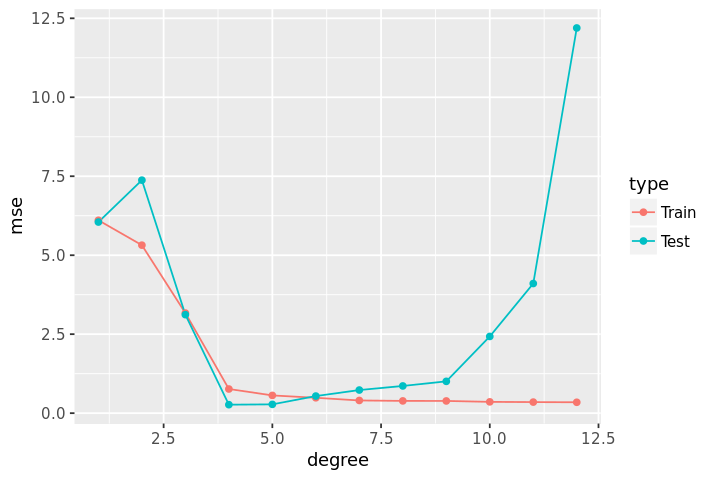

In [22]:
calcmse<-function(y_real,y_est){
    sum((y_real-y_est)^2)/length(y_real)
}

idx<-1:20
train.df<-data.df[idx,c("x","y")]
test.df <-data.df[-idx,c("x","y")]

mse_train<-c()
mse_test<-c()
for (i in 1:12){
    model<-lm(formula = y~poly(x,i),data=train.df)
    yp_train<-predict(model,train.df)
    mse_train[i]<-calcmse(train.df$y,yp_train)
    
    yp_test<-predict(model,test.df)
    mse_test[i]<-calcmse(test.df$y,yp_test)
}

mse.df<-data.frame(degree=1:length(mse_train),mse=mse_train,type="Train")
mse.df<-rbind(mse.df,data.frame(degree=1:length(mse_train),mse=mse_test,type="Test"))
ggplot(mse.df,aes(x=degree,y=mse,color=type))+geom_line()+geom_point()


Si un modelo es demasiado simple tanto el error de test como de entrenamiento será alto.

A medida que el modelo es más complejo el error disminuye.

Si el modelo es demasiado complejo ocurre el **sobreajuste** el modelo aprende sobre el ruido de nuestro modelo de entrenamiento y no es capaz de  generalizar bien.
Para evitar el sobreajuste(overfitting) se puede recurrir a simplificar el modelo o a poner limitaciones sobre el mismo. Esto se conoce con el nombre de regularización.
* Regularización Ridge o $L^2$: se evita que los parámetros crezcan demasiado. Se añade la función de coste:
\\[
Coste = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}+\lambda \sum_j \beta^2
\\]
* Regularización Lasso o $L$: permite seleccionar los parámetros que más afectan al resultado. Se añade la función de coste:
\\[
Coste = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}+\lambda \sum_j | \beta |
\\]




### Prediciendo la potencia de generación de una central de ciclo combinado

El conjunto de datos contiene 9568 puntos de datos recopilados de una Central de Ciclo Combinado durante 6 años (2006-2011), cuando la planta de energía se puso a funcionar con carga completa. Las características consisten en variables ambientales promedio por hora, Temperatura (T), Presión ambiente (AP), Humedad relativa (HR) y Vacío de escape (V) para predecir la producción neta de energía eléctrica por hora (EP) de la planta.

Features consist of hourly average ambient variables 
- Temperature (AT) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

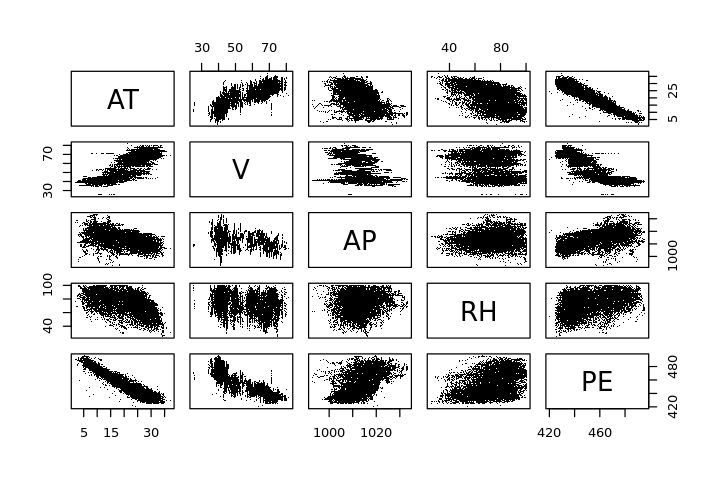

In [23]:
powerplant<-read.csv("data/powerplant.csv")

plot(powerplant,pch='.')

[1] 4.460591

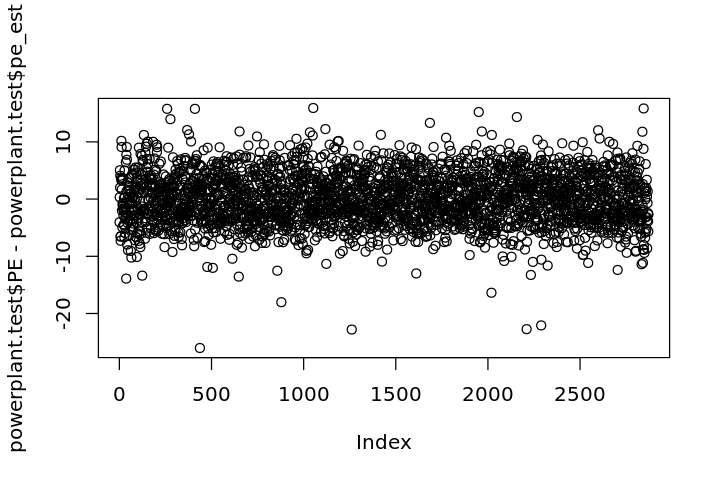

In [24]:
set.seed(1234)
idx<-sample(1:nrow(powerplant),nrow(powerplant)*0.7)
powerplant.train<-powerplant[idx,]
powerplant.test<-powerplant[-idx,]

model_powerplant<-lm(PE~.,data=powerplant.train)
#summary(model_powerplant)
powerplant.test$pe_est<-predict(model_powerplant,powerplant.test)
plot(powerplant.test$PE-powerplant.test$pe_est)

sqrt(mean((powerplant.test$PE-powerplant.test$pe_est)^2))

### Prediciendo la dureza del hormigón

Resumen: El hormigón es el material más importante en la ingeniería civil. los la resistencia a la compresión del hormigón es una función altamente no lineal de la edad y ingredientes Estos ingredientes incluyen cemento, escoria de alto horno, cenizas volantes, agua, superplastificante, agregado grueso y agregado fino.

Fuente:
https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

**Características de los datos:**
    
La resistencia a la compresión real del hormigón (MPa) para una mezcla dada bajo un
la edad específica (días) se determinó a partir del laboratorio. Los datos están en forma cruda (no a escala).

**Resumen estadístico:**

Número de instancias (observaciones): 1030
Cantidad de Atributos: 9
Desglose de atributos: 8 variables de entrada cuantitativas y 1 variable de salida cuantitativa
Faltan valores de atributo: ninguno


* Cemento (componente 1) - cuantitativo - kg en una mezcla m3 - Variable de entrada
* Escoria de alto horno (componente 2) - cuantitativa - kg en una mezcla de m3 - Variable de entrada
* Cenizas volantes (componente 3) - cuantitativo - kg en una mezcla m3 - Variable de entrada
* Agua (componente 4) - cuantitativa - kg en una mezcla m3 - Variable de entrada
* Superplastificante (componente 5) - cuantitativo - kg en una mezcla m3 - Variable de entrada
* Agregado grueso (componente 6) - cuantitativo - kg en una mezcla m3 - Variable de entrada
* Agregado fino (componente 7) - cuantitativo - kg en una mezcla m3 - Variable de entrada
* Edad - cuantitativa - Día (1 ~ 365) - Variable de entrada
* Resistencia a la compresión del hormigón - cuantitativa - MPa - Variable de salida


In [25]:
concrete<-read.csv("data/Concrete_Data.csv",
                   col.names=c("cemento","escoria","cenizas","agua","plastificante","aggrueso","agfino","edad","resistencia"))
summary(concrete)

    cemento         escoria         cenizas            agua      
 Min.   :102.0   Min.   :  0.0   Min.   :  0.00   Min.   :121.8  
 1st Qu.:192.4   1st Qu.:  0.0   1st Qu.:  0.00   1st Qu.:164.9  
 Median :272.9   Median : 22.0   Median :  0.00   Median :185.0  
 Mean   :281.2   Mean   : 73.9   Mean   : 54.19   Mean   :181.6  
 3rd Qu.:350.0   3rd Qu.:142.9   3rd Qu.:118.30   3rd Qu.:192.0  
 Max.   :540.0   Max.   :359.4   Max.   :200.10   Max.   :247.0  
 plastificante       aggrueso          agfino           edad       
 Min.   : 0.000   Min.   : 801.0   Min.   :594.0   Min.   :  1.00  
 1st Qu.: 0.000   1st Qu.: 932.0   1st Qu.:731.0   1st Qu.:  7.00  
 Median : 6.400   Median : 968.0   Median :779.5   Median : 28.00  
 Mean   : 6.205   Mean   : 972.9   Mean   :773.6   Mean   : 45.66  
 3rd Qu.:10.200   3rd Qu.:1029.4   3rd Qu.:824.0   3rd Qu.: 56.00  
 Max.   :32.200   Max.   :1145.0   Max.   :992.6   Max.   :365.00  
  resistencia   
 Min.   : 2.33  
 1st Qu.:23.71  
 Median :34

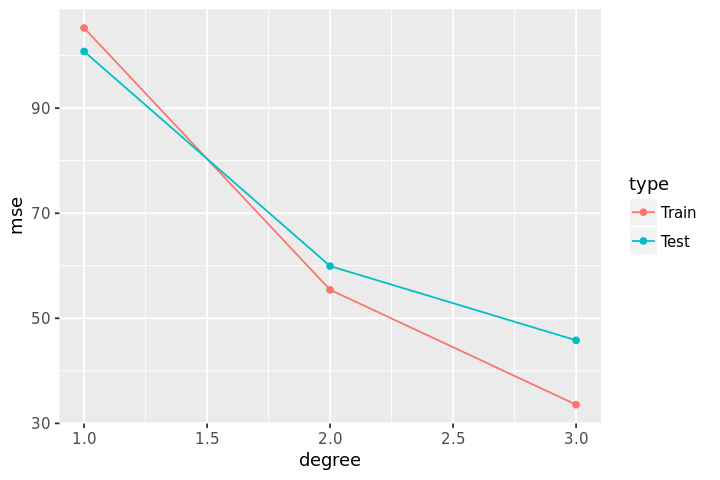

In [26]:
set.seed(12)
idx<-sample(1:nrow(concrete),nrow(concrete)*0.7)
train.df<-concrete[idx,]
test.df<-concrete[-idx,]


calcmse<-function(y_real,y_est){
    sum((y_real-y_est)^2)/length(y_real)
}


mse_train<-c()
mse_test<-c()
for (N in 1:3){
    model<-lm(resistencia~
           poly(cemento,N)*poly(escoria,N)*poly(cenizas,N)+
           poly(agua,N)*poly(plastificante,N)+
           poly(aggrueso,N)*poly(agfino,N)+
           poly(edad,N),data = train.df)
    
    
    yp_train<-predict(model,train.df)
    mse_train[N]<-calcmse(train.df$resistencia,yp_train)
  
    yp_test<-predict(model,test.df)
    mse_test[N] <-calcmse(test.df$resistencia,yp_test)
}
mse.df<-data.frame(degree=1:length(mse_train),mse=mse_train,type="Train")
mse.df<-rbind(mse.df,data.frame(degree=1:length(mse_train),mse=mse_test,type="Test"))

library(ggplot2)
ggplot(mse.df,aes(x=degree,y=mse,color=type))+geom_line()+geom_point()


In [27]:
mse.df


degree,mse,type
1,105.26868,Train
2,55.42598,Train
3,33.56013,Train
1,100.79675,Test
2,59.93763,Test
3,45.80973,Test


## Normalización

Muchas veces los datos de diferentes orígenes, columnas, dimensiones, vienen en distintas escalas. 

Las dos **normalizaciones más comunes** son:

Podemos maximizar para dejar todos nuestros datos en el rango [0,1]:
\\[
X_n=\frac{X- min\{X\} }{max\{X\}-min\{X\}}
\\]
A veces existen variaciones de esta normalización. El máximo y el mínimo puede ser peligroso si tenemos outliers, es posible que 

Podemos maximizar para dejar todos nuestros datos con media $0$ y varianza $1$:
\\[
X_n=\frac{X-\mu}{\sigma}
\\]




Veamos un ejemplo con los dtaos del hormigón. Si podemos mejorar la predicción anterior y por cuanto:

In [28]:
library(pracma) 
mnCols<-repmat(colMeans(train.df),n = nrow(train.df),m=1)
sdCols<-repmat(sapply(train.df, sd,na.rm=T),n = nrow(train.df),m=1)
train_norm<-(train.df-mnCols)/sdCols
test_norm<-(test.df-mnCols[1:nrow(test.df),])/sdCols[1:nrow(test.df),]

mnResistencia<-mean(train.df$resistencia,na.rm=T)
sdesistencia<-sd(train.df$resistencia,na.rm=T)

mynormResistencia<-function(y){
    (y-mnResistencia)/sdesistencia
}
myDenormResistencia<-function(y){
    y*sdesistencia+mnResistencia
}


degree,mse,type
1,105.26868,Train
2,55.42598,Train
3,33.56013,Train
1,100.79675,Test
2,59.93763,Test
3,45.80973,Test


degree,mse,type
1,105.26868,Train
2,55.42598,Train
3,33.56013,Train
1,100.79675,Test
2,59.93763,Test
3,45.80973,Test


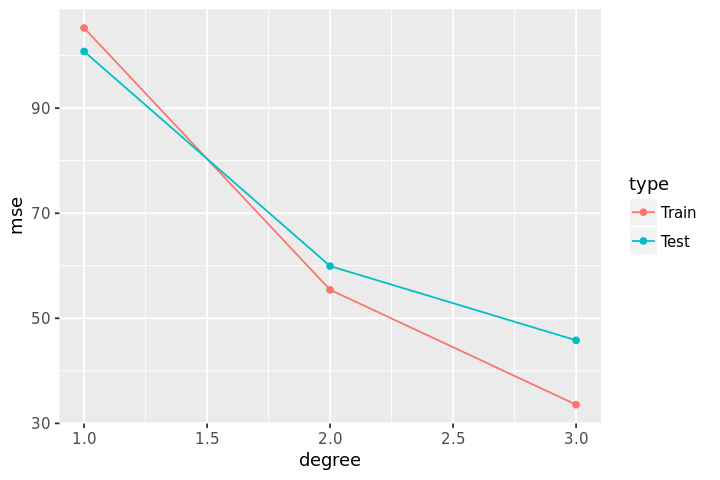

In [29]:


mse_train<-c()
mse_test<-c()
for (N in 1:3){
    model<-lm(resistencia~
           poly(cemento,N)*poly(escoria,N)*poly(cenizas,N)+
           poly(agua,N)*poly(plastificante,N)+
           poly(aggrueso,N)*poly(agfino,N)+
           poly(edad,N),data = train_norm)
    
    yp_train<-predict(model,train_norm)
    mse_train[N]<-calcmse(train_norm$resistencia,yp_train)
    mse_train[N]<-calcmse(myDenormResistencia(train_norm$resistencia),myDenormResistencia(yp_train))
  
    yp_test<-predict(model,test_norm)
    mse_test[N] <-calcmse(test_norm$resistencia,yp_test)
    mse_test[N] <-calcmse(myDenormResistencia(test_norm$resistencia),myDenormResistencia(yp_test))
}
mse_norm.df<-data.frame(degree=1:length(mse_train),mse=mse_train,type="Train")
mse_norm.df<-rbind(mse_norm.df,data.frame(degree=1:length(mse_train),mse=mse_test,type="Test"))
mse.df
mse_norm.df
ggplot(mse_norm.df,aes(x=degree,y=mse,color=type))+geom_line()+geom_point()

In [30]:
head(test_norm$resistencia)
head(test.df$resistencia)

[1] 1.5544312 0.3166796 0.5097071 0.4740712 0.3927027 0.2163053

[1] 61.89 41.05 44.30 43.70 42.33 39.36

## Variables categóricas

Variables categóricas son aquellas que no presentan un valor de un número real sino una categoría, es decir pueden tomar un valor dentro de un conjutno fijo y limitado de posible valores, con o sin orden. Ejemplo:
* Variables binarias: Si/No
* Categóricas con orden: nada/poco/normal/mucho.
* Categóricas sin orden: rojo/verde/azul

Antes de utilizar una de estas variables en un algoritmo de aprendizaje hay que convertirlo a un número real, es necesario **coficarlo** para que el algoritmo correspondiente lo interprete correctamente.

En R las variables categóricas se crean con la función factor:

### One-hot

Se crean N columnas nuevas, tantas como posibles valores tenga la variable categórica.
Se asigna un valor de 1 a la variable que tiene ese valor 0 en caso contrario.


|-|col1|col2|col3|col4|
|-|:--:| -----:|--|--|
|categoria1|1|0|0|0|
|categoria2|0|1|0|0|
|categoria3|0|0|1|0|
|categoria4|0|0|0|1|

### Dummy

Se crean N-1 columnas nuevas, tantas como posibles valores tenga la variable categórica menos una.
para una categoría en la que todos los valores serán 0, esa catergoría será usada como base del modelo.
Al resto de columnas se le asigna un valor de 1 a la variable que tiene ese valor 0 en caso contrario. 

|-|col1|col2|col3|
|-|:--:| -----:|--|
|categoria1|0|0|0|
|categoria2|1|0|0|
|categoria3|0|1|0|
|categoria4|0|0|1|

```
> contr.treatment(4)
```

### Ortogonal de polinomios

La codificación ortogonal de polinomios es una forma de análisis de tendencias en el sentido de que busca tendencias lineales, cuadráticas, cúbicas, grado-n, etc.. en la variable categórica. Este tipo de sistema de codificación debe usarse solo con una variable ordinal en la que los niveles están equiespaciados. 

|-| .L|.Q|.C|
|-|:--:| -----:|--|
|categoria1| -0.6708204 |  0.5 | -0.2236068 |
|categoria2| -0.2236068 | -0.5 | 0.6708204 |
|categoria3|  0.2236068 | -0.5 | -0.6708204|
|categoria4|  0.6708204 |  0.5 | 0.2236068|

```
> contr.poly(4)
```


### Codificación Helmert

La codificación Helmert compara cada nivel de una variable categórica con la media de los niveles subsiguientes. Por lo tanto, el primer contraste compara la media de la variable dependiente para el nivel 1 con la media de todos los niveles posteriores (niveles 2, 3 y 4), el segundo contraste compara la media de la variable dependiente para el nivel 2  con la media de todos los niveles posteriores (niveles 3 y 4), y el tercer contraste compara la media de la variable dependiente para el nivel 3  con la media de todos los niveles posteriores (nivel 4).

|-|col1|col2|col3|
|-|:--:| -----:|--|
|categoria1|-1|-1|-1|
|categoria2|1|-1|-1|
|categoria3|0|2|-1|
|categoria4|0|0|3|


### Ejemplo codificacion One-hot y Dummy

|-|col1|col2|col3|col4|
|-|:--:| -----:|--|--|
|categoria1|1|0|0|0|
|categoria2|0|1|0|0|
|categoria3|0|0|1|0|
|categoria4|0|0|0|1|


|-|col1|col2|col3|
|-|:--:| -----:|--|
|categoria1|0|0|0|
|categoria2|1|0|0|
|categoria3|0|1|0|
|categoria4|0|0|1|


#### Ejemplo 1

Este archivo de datos  contiene 200 observaciones de una muestra de estudiantes de secundaria con información demográfica sobre los estudiantes, como su género (female), estado socioeconómico (ses) y origen étnico (race). También contiene una cantidad de puntajes en exámenes estandarizados, que incluyen exámenes de lectura (read), escritura (write), matemáticas (math) y estudios sociales (socst).

https://stats.idre.ucla.edu/stat/data/hsb2.csv

Las variables categóricas que tenemos son:
* female: 0 - hombre, 1 - mujer
* race: 0 - hispano, 2 - asiático, 3 - afroamericano, 4 - caucásico
* ses: 1 - Bajo, 2 - Medio, 3 - Alto
* sychtyp: 1 - escuela pública, 2 - escuela privada
* prog: 1 - general, 2 - académico, 3 - vocacional

In [31]:
hsb2 = read.table('./data//hsb2.csv', header=T, sep=",")
hsb2$race.f = factor(hsb2$race, labels=c("Hispano", "Asiatico", "Afroamericano", "Caucasico"))



head(hsb2)

id,female,race,ses,schtyp,prog,read,write,math,science,socst,race.f
70,0,4,1,1,1,57,52,41,47,57,Caucasico
121,1,4,2,1,3,68,59,53,63,61,Caucasico
86,0,4,3,1,1,44,33,54,58,31,Caucasico
141,0,4,3,1,3,63,44,47,53,56,Caucasico
172,0,4,2,1,2,47,52,57,53,61,Caucasico
113,0,4,2,1,2,44,52,51,63,61,Caucasico


In [32]:
summary(lm(write~race.f, hsb2))
N<-length(levels(hsb2$race.f))

onehotcols<-matrix(rep(0,N*nrow(hsb2)),ncol=N,nrow=nrow(hsb2))

for (i in 1:nrow(hsb2)){
    onehotcols[i,as.numeric(hsb2$race.f[i])]<-1
}
colnames(onehotcols)<-paste0("race_",levels(hsb2$race.f))

hsb2_onehot<-cbind(hsb2,onehotcols)
dplyr::sample_n(hsb2_onehot,10)
summary(lm(write~race_Hispano+race_Asiatico+race_Afroamericano+race_Caucasico+0, hsb2_onehot))


Call:
lm(formula = write ~ race.f, data = hsb2)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.0552  -5.4583   0.9724   7.0000  18.8000 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           46.458      1.842  25.218  < 2e-16 ***
race.fAsiatico        11.542      3.286   3.512 0.000552 ***
race.fAfroamericano    1.742      2.732   0.637 0.524613    
race.fCaucasico        7.597      1.989   3.820 0.000179 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.025 on 196 degrees of freedom
Multiple R-squared:  0.1071,	Adjusted R-squared:  0.0934 
F-statistic: 7.833 on 3 and 196 DF,  p-value: 5.785e-05


,id,female,race,ses,schtyp,prog,read,write,math,science,socst,race.f,race_Hispano,race_Asiatico,race_Afroamericano,race_Caucasico
10,48,0,3,2,1,2,57,55,52,50,51,Afroamericano,0,0,1,0
44,40,0,3,1,1,1,42,41,43,50,41,Afroamericano,0,0,1,0
88,117,0,4,3,1,3,34,49,39,42,56,Caucasico,0,0,0,1
136,61,1,4,3,1,2,76,63,60,67,66,Caucasico,0,0,0,1
194,30,1,2,3,1,2,41,59,42,34,51,Asiatico,0,1,0,0
86,146,0,4,3,1,2,55,62,64,63,66,Caucasico,0,0,0,1
166,69,1,4,1,1,3,44,44,40,40,31,Caucasico,0,0,0,1
142,90,1,4,3,1,2,42,54,50,50,52,Caucasico,0,0,0,1
23,41,0,3,2,1,2,50,40,45,55,56,Afroamericano,0,0,1,0
34,150,0,4,2,1,3,42,41,57,72,31,Caucasico,0,0,0,1



Call:
lm(formula = write ~ race_Hispano + race_Asiatico + race_Afroamericano + 
    race_Caucasico + 0, data = hsb2_onehot)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.0552  -5.4583   0.9724   7.0000  18.8000 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
race_Hispano        46.4583     1.8422   25.22   <2e-16 ***
race_Asiatico       58.0000     2.7212   21.31   <2e-16 ***
race_Afroamericano  48.2000     2.0181   23.88   <2e-16 ***
race_Caucasico      54.0552     0.7495   72.12   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.025 on 196 degrees of freedom
Multiple R-squared:  0.9722,	Adjusted R-squared:  0.9717 
F-statistic:  1716 on 4 and 196 DF,  p-value: < 2.2e-16


In [33]:
contr.helmert(4)

contrasts(hsb2$race.f) = contr.helmert(4)
M<-attributes(hsb2$race.f)$contrasts
rmodel<-lm(write ~ race.f, hsb2)
summary(rmodel)

M
rmodel$coef[1]+sum(rmodel$coef[2:4]*M[1,])
rmodel$coef[1]+sum(rmodel$coef[2:4]*M[2,])
rmodel$coef[1]+sum(rmodel$coef[2:4]*M[3,])
rmodel$coef[1]+sum(rmodel$coef[2:4]*M[4,])

rmodel$coef[1]+M%*%as.matrix(rmodel$coef[2:4],ncol=1)

1,-1,-1,-1
2,1,-1,-1
3,0,2,-1
4,0,0,3



Call:
lm(formula = write ~ race.f, data = hsb2)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.0552  -5.4583   0.9724   7.0000  18.8000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  51.6784     0.9821  52.619  < 2e-16 ***
race.f1       5.7708     1.6431   3.512 0.000552 ***
race.f2      -1.3431     0.8675  -1.548 0.123170    
race.f3       0.7923     0.3720   2.130 0.034439 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.025 on 196 degrees of freedom
Multiple R-squared:  0.1071,	Adjusted R-squared:  0.0934 
F-statistic: 7.833 on 3 and 196 DF,  p-value: 5.785e-05


Hispano,-1,-1,-1
Asiatico,1,-1,-1
Afroamericano,0,2,-1
Caucasico,0,0,3


(Intercept) 
   46.45833

(Intercept) 
         58

(Intercept) 
       48.2

(Intercept) 
   54.05517

Hispano,46.45833
Asiatico,58.00000
Afroamericano,48.20000
Caucasico,54.05517


#### Ejemplo 2

Dataset de automóviles y seguros.

https://archive.ics.uci.edu/ml/datasets/Automobile

In [34]:

autos<-read.csv("./data//imports-85.data", col.names = c("risk", "normalized_losses", 
                                                         "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"))
autos<-autos[,c("price","horsepower","length","width","body_style","risk")]
autos$horsepower[autos$horsepower=="?"]<-NA
autos$horsepower<-as.numeric(autos$horsepower)
autos$price<-as.numeric(autos$price)



N<-length(levels(autos$body_style))

onehotcols<-matrix(rep(0,N*nrow(autos)),ncol=N,nrow=nrow(autos))

for (i in 1:nrow(autos)){
    onehotcols[i,as.numeric(autos$body_style[i])]<-1
}
colnames(onehotcols)<-paste0("style_",levels(autos$body_style))

autos_onehot<-cbind(autos,onehotcols)

summary(lm(risk ~ horsepower+length*width+style_convertible+style_hardtop+
           style_hatchback+style_hatchback+style_sedan+style_wagon+0 ,data=autos_onehot))


Call:
lm(formula = risk ~ horsepower + length * width + style_convertible + 
    style_hardtop + style_hatchback + style_hatchback + style_sedan + 
    style_wagon + 0, data = autos_onehot)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4367 -0.5606 -0.0576  0.6080  1.6961 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)   
horsepower         -0.011585   0.003904  -2.967  0.00338 **
length              0.275339   0.148422   1.855  0.06511 . 
width               0.781012   0.427848   1.825  0.06948 . 
style_convertible -45.256797  27.601604  -1.640  0.10271   
style_hardtop     -46.026037  27.565668  -1.670  0.09660 . 
style_hatchback   -46.428284  27.580504  -1.683  0.09392 . 
style_sedan       -47.475364  27.568589  -1.722  0.08666 . 
style_wagon       -47.832460  27.559443  -1.736  0.08423 . 
length:width       -0.004450   0.002280  -1.952  0.05243 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9576 

In [35]:
summary(autos$body_style)
summary(lm(risk ~ horsepower+length*width+body_style ,data=autos))

convertible     hardtop   hatchback       sedan       wagon 
          5           8          70          96          25


Call:
lm(formula = risk ~ horsepower + length * width + body_style, 
    data = autos)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4367 -0.5606 -0.0576  0.6080  1.6961 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -45.256797  27.601604  -1.640  0.10271    
horsepower           -0.011585   0.003904  -2.967  0.00338 ** 
length                0.275339   0.148422   1.855  0.06511 .  
width                 0.781012   0.427848   1.825  0.06948 .  
body_stylehardtop    -0.769241   0.548648  -1.402  0.16250    
body_stylehatchback  -1.171487   0.445286  -2.631  0.00920 ** 
body_stylesedan      -2.218567   0.446297  -4.971 1.47e-06 ***
body_stylewagon      -2.575664   0.489152  -5.266 3.71e-07 ***
length:width         -0.004450   0.002280  -1.952  0.05243 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9576 on 193 degrees of freedom
  (2 observations deleted due to missingness)
M

## Missing Values

Son valores para los cuales no tenemos ninguna medida, se representan con un NA.

Pertenecen a valores perdidos que no se han podido recuperar, errores de medida, perdidas de datos, etc..

En R los detectamos con:
```
is.na(x)
```
y podemos reemplazar su valor con la media, moda, mediana, etc...
```
x[is.na(x)]<-mean(x,na.rm=T)
```
o simplemente eliminarlos:
na.omit(x)

Si estamos trabajando con series temporales es posible que queramos hacer una interpolación de los valores perdidos:
```
zoo::na.approx(x)
```

In [36]:
x<-NA
autos$horsepower[is.na(autos$horsepower)]<-mean(autos$horsepower,na.rm=T)
summary(autos$horsepower)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   13.75   39.50   32.59   47.00   59.00 

# Regresión logística

En lugar de realizar una predicción de un valor queremos hacer un clasificador.

Por ejemplo: Trabajamos en un maderera y queremos saber si un tronco es de un abedul o de un abeto basándonos únicamente en el diametro y la longitud del tronco.

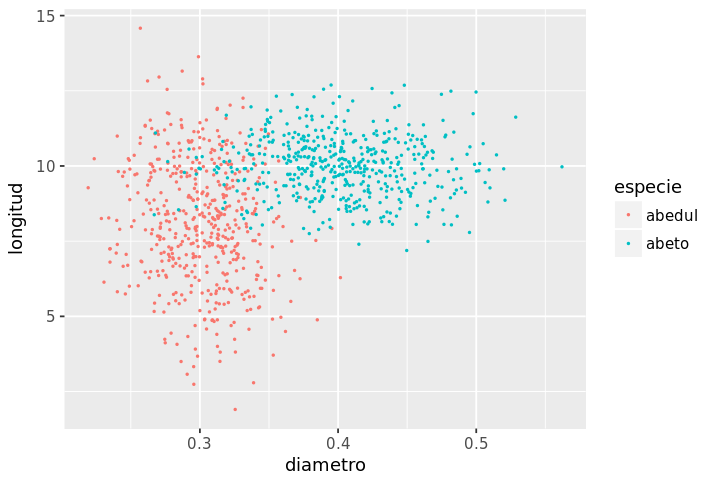

In [37]:
library(ggplot2)
set.seed(123)
arboles<-read.csv("data/arboles.csv")
ggplot(arboles,aes(x=diametro,y=longitud,color=especie))+geom_point(size=0.3)

Podemos hacer una clasificación con un modelo lineal donde creamos una nueva columna *especie.n* y le asignamos:
* abeto  = 1
* abedul = 0

Utilizamos un modelo lineal tal que:
\\[
  especie = \beta_0+\beta_1·diametro+\beta_2·longitud
\\]

Entonces:
* si especie >= 0.5 es un abeto
* si especie <  0.5 es un abedul

La recta que marcará el umbral será:
\\[
\begin{split}    
  0.5 &= \beta_0+\beta_1·diametro+\beta_2·longitud \\
  -\beta_2 longitud &= \beta_0+\beta_1·diametro - 0.5\\
  longitud &= \frac{0.5-\beta_0}{\beta_2}-\frac{\beta_1}{\beta_2}·diametro
\end{split}  
\\]



(Intercept)    diametro    longitud 
 -2.0218764   5.3786379   0.0675531

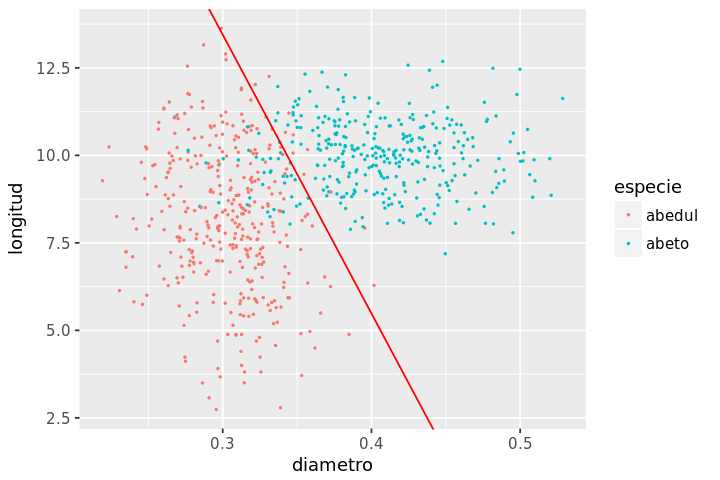

In [38]:
arboles$especie.n[arboles$especie=="abeto"] <- 1
arboles$especie.n[arboles$especie=="abedul"]<- 0

itrain<-sample(1:nrow(arboles),nrow(arboles)*0.7)
arboles.train<-arboles[itrain,]
arboles.test<-arboles[-itrain,]


modellm<-lm(data=arboles.train,formula=especie.n~diametro+longitud)
beta<-modellm$coefficients
beta

ggplot(arboles.train,aes(x=diametro,y=longitud,color=especie))+geom_point(size=0.3)+
 geom_abline(intercept = (0.5-beta[1])/beta[3],slope = -beta[2]/beta[3], color="red" )

Pero esto no es del todo correcto porque los datos **NO** siguen una distribución gaussiana. Siguen una distribución binomial con dos posibles valores 0 o 1.

Para pasar del dominio de números reales $(-\infty,\infty)$ al de probabilidades $[0,1]$ a vamos a utilizar la **función logística**:
\\[
h(x) = \frac{1}{1+e^{-x}}
\\]
Su inversa se conoce como la función **logit**:
\\[
h^{-1}(p) = log \left( \frac{p}{1-p} \right)
\\]

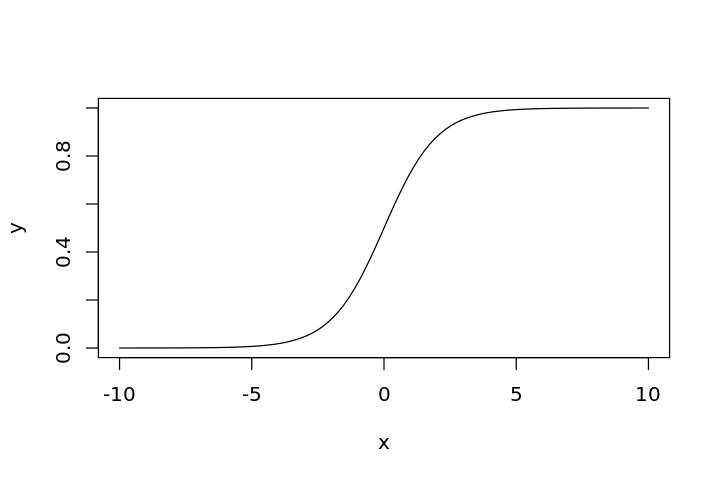

In [39]:
x<-seq(-10,10,length.out = 100)
y<-1/(1+exp(-x))
plot(x,y,t="l")

Es decir, cuando estemos trabajando con una distribución binomial un modelo lineal del tipo:
\\[
y = \beta \vec{x}+\beta_0
\\]
será:
\\[
y = h(x) = \frac{1}{1+e^{-\beta \vec{x}-\beta_0}} 
\\]
Ahora $h(x)$ es una función que muestra valores en el rango $[0,1]$, puede ser considerada como una probabilidad.

Y tenemos el siguiente clasificador:
* Seleccionamos clase 1 si h(x)>=0.5
* Seleccionamos clase 0 si h(x)< 0.5

La función de coste que vamos a tratar de minimizar será:
\\[
\begin{split}
Cost(h(x),y) &= {1 \over n} \sum_{i=0}^n{(y-\hat{y})^2}\\
Cost(h(x),y) &= {1 \over n} \sum_{i=0}^n{(y-h(x)^2)}
\end{split}
\\]
Que transformaremos en:
\\[
Cost(h(x),y) = -y ·log(h(x))-(1-y)·log(1-h(x))
\\]



In [45]:
model<- glm(data=arboles.train,formula=especie.n~diametro+longitud,family = binomial(link='logit'))
betalg<-model$coefficients
betalg
ggplot(arboles.train,aes(x=diametro,y=longitud,color=especie))+geom_point(size=0.3)+
 geom_abline(intercept = (0.5-beta[1])/beta[3],slope = -beta[2]/beta[3], color="red" )+
 geom_abline(intercept = (0.5-betag[1])/betag[3],slope = -betag[2]/betag[3], color="blue" )


(Intercept)    diametro    longitud 
 -31.622227   70.694497    0.780353

ERROR: Error in data.frame(intercept = intercept, slope = slope): object 'betag' not found


### Matriz de confusión

Aqui lo que tenemos es un estimador con dos hipótesis $H_0$ y $H_1$. 
Si nuestro test estadístico dice que la hipótesis $H_1$ es cierta pero en realidad la que es cierta es la hipótesis $H_0$ estaremos cometiendo un error.
El tipo de error depende de si nos hemos equivocado prediciendo $H_0$ o $H_1$.

||$H_0$ cierta|$H_1$ cierta|
|-|-|-|
|Elegimos $H_0$| No hay error |Error tipo II, falso negativo|
|Elegimos $H_1$| Error tipo I, falso positivo| No hay error |


La matriz de confusión lo que hace es contar el número de ocurrencias que ha habido en cada celda:


2      3      4     10     11     14     22     27     28     34     35 
abedul abedul abedul abedul  abeto abedul abedul  abeto abedul abedul abedul 
    48     52     55     57     65     67     74     75     76     77     78 
abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul 
    86     96     97     98    101    104    105    107    110    111    115 
abedul abedul abedul  abeto abedul abedul abedul abedul abedul abedul abedul 
   118    122    125    134    139    140    141    142    149    155    156 
abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul 
   157    161    179    180    187    189    190    194    195    199    202 
abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul 
   203    211    213    218    219    222    224    227    230    233    239 
abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul 
   245    251    253    259    260    263    267    272    277    278    280 
abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul 
   283    292    295    299    303    306    308    309    310    311    315 
abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul 
   316    322    326    331    333    336    339    340    346    355    359 
abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul 
   362    365    366    371    377    378    383    386    390    391    400 
abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul 
   404    407    413    415    418    419    421    428    430    432    436 
abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul 
   438    440    447    448    454    455    463    466    469    474    476 
abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul abedul 
   479    481    487    488    489    495    499    500    504    505    507 
abedul abedul abedul abedul  abeto abedul abedul abedul  abeto  abeto  abeto 
   508    511    512    515    518    519    520    521    522    526    529 
abedul  abeto  abeto  abeto abedul  abeto  abeto  abeto  abeto abedul  abeto 
   538    541    543    552    558    559    561    562    564    568    575 
 abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto 
   577    582    587    589    599    600    602    606    607    611    613 
 abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto 
   616    621    625    630    631    632    633    641    643    645    646 
 abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto abedul abedul  abeto 
   648    653    655    656    664    665    671    673    675    678    682 
 abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto 
   683    684    685    688    690    693    694    703    707    709    710 
 abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto 
   714    720    725    729    735    736    737    740    743    744    747 
 abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto 
   755    760    761    764    765    767    768    778    782    785    787 
 abeto abedul  abeto  abeto  abeto  abeto abedul  abeto  abeto  abeto  abeto 
   792    799    801    803    805    807    808    811    812    813    817 
 abeto  abeto  abeto  abeto  abeto abedul  abeto  abeto  abeto abedul  abeto 
   822    823    825    826    827    828    829    830    836    846    847 
 abeto abedul  abeto  abeto  abeto  abeto  abeto  abeto abedul abedul  abeto 
   850    851    854    861    865    866    869    870    878    886    890 
 abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto  abeto 
   892    896    897    899    903    905    906    910    912    913    915 
abedul  abeto  abeto  abeto  abeto  abeto abedul  abeto  abeto  abeto  abeto 
   917    920    922    924    925    930    934    940    941    942    944 
 abeto  abeto  abeto  abeto

136,17
4,143


        
y_est    abedul abeto
  abedul    136    17
  abeto       4   143

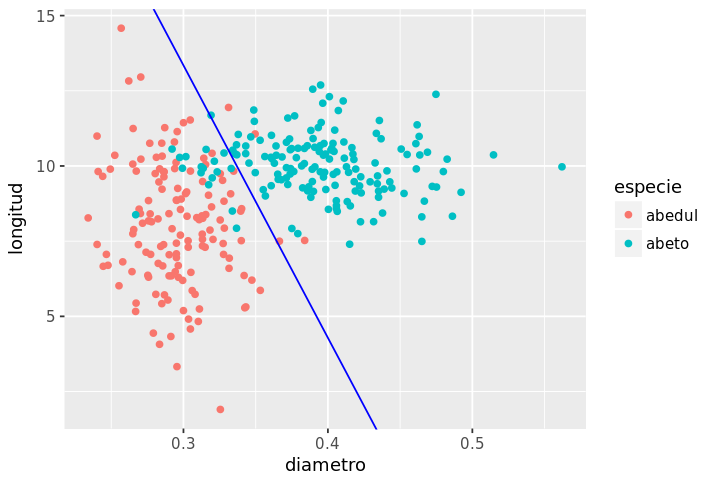

In [44]:
M<-matrix(rep(0,4),ncol = 2)
y_est=factor(ifelse(predict(model,arboles.test)< 0,0,1),labels=c("abedul","abeto"))
y_est
idx_abedul<-arboles.test$especie=="abedul"
idx_abeto <-arboles.test$especie=="abeto"


M[1,1]=sum(y_est[idx_abedul]=="abedul")
M[1,2]=sum(y_est[idx_abeto]=="abedul")
M[2,1]=sum(y_est[idx_abedul]=="abeto")
M[2,2]=sum(y_est[idx_abeto]=="abeto")
M

table(y_est,arboles.test$especie)

ggplot(arboles.test,aes(x=diametro,y=longitud,color=especie))+geom_point()+
 geom_abline(intercept = -betalg[1]/betalg[3],slope = -betalg[2]/betalg[3], color="blue" )

### Medidas de calidad

Imaginemos que tenemos la siguiente matriz de confusión:

||Condición positiva|Condición negativa|
|-|-|-|
|Predecimos condición positiva| $M_{11}$ | $M_{12}$|
|Predecimos condición negativa| $M_{21}$| $M_{22}$ |

**Precisión** : $\frac{M_{11}}{M_{12}+M_{11}}$. Cuantos aciertos tengo del total de predicciones.

**Exhaustividad** (recall): $\frac{M_{11}}{M_{21}+M_{11}}$. Que ratio de los aciertos positivos soy capaz de encontrar.

**Exactitud** (Accuracy): $\frac{M_{11}+M_{22}}{M_{11}+M_{12}+M_{21}+M_{22}}$: Cuantas predicciones correctas he hecho.

**Valor-F**: $F_\beta=(1+\beta^2)\frac{Precisión·Exhaustividad}{\beta^2·Precisión+Exhaustividad}$



In [ ]:
paste("Precision:", M[1,1]/(M[1,2]+M[1,1]))
paste("Exhausitivad:", M[1,1]/(M[2,1]+M[1,1]))
paste("Exactitud:",(M[1,1]+M[2,2])/sum(sum(M)))
p<-M[1,1]/(M[1,2]+M[1,1])
e<-M[1,1]/(M[2,1]+M[1,1])
b<-0.5
(1+b^2)*(p*e)/(b^2*p+e)

## Curva ROC

Se utiliza para ver la calidad de un detector, un clasificador binario capaz de detectar un elemento.
Se hace un barrido por todos los umbrales y se mide el valor de positivo verdadero en función de falso positivo.

In [ ]:
calctp_fp<-function(y_predict,y_real,th){
    y_est<-ifelse(y_predict<th,0,1)
    idx_abedul<-y_real==1
    idx_abeto <-y_real==0

    M<-table(y_est,arboles.test$especie)
    if (ncol(M)==2 && nrow(M)==2){
        truePositive<-M[1,1]/(M[1,1]+M[2,1])
        falsePositive<-M[1,2]/(M[1,2]+M[2,2])
        c(tp=truePositive,fp=falsePositive)
    }else{
        c(tp=NA,fp=NA)
    }
}

y_predict<-predict(model,arboles.test)
dfROC<-data.frame(th=unique(y_predict),tp=NA,fp=NA,model="model1")

for (i in 1:nrow(dfROC)){
    v<-calctp_fp(y_predict,arboles.test$especie.n,dfROC$th[i])
    dfROC$tp[i]<-v["tp"]
    dfROC$fp[i]<-v["fp"]
}

model2<-glm(data=arboles.train,formula=especie~longitud,family=binomial(link='logit'))
y_predict<-predict(model2,arboles.test)
dfROC2<-data.frame(th=unique(y_predict),tp=NA,fp=NA,model="model2")

for (i in 1:nrow(dfROC)){
    v<-calctp_fp(y_predict,arboles.test$especie.n,dfROC2$th[i])
    dfROC2$tp[i]<-v["tp"]
    dfROC2$fp[i]<-v["fp"]
}
dfROC<-rbind(dfROC,dfROC2)
dfROC<-dfROC[order(dfROC$fp),]
ggplot(data=dfROC,aes(x=fp,y=tp,color=model))+geom_path()

#### Ejemplo

Las características se calculan a partir de una imagen digitalizada de aspiración con aguja fina (PAAF) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Attribute Information:

1) ID number 
2) Diagnosis (M = malignant, B = benign) 
3-32) 

Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter) 
b) texture (standard deviation of gray-scale values) 
c) perimeter 
d) area 
e) smoothness (local variation in radius lengths) 
f) compactness (perimeter^2 / area - 1.0) 
g) concavity (severity of concave portions of the contour) 
h) concave points (number of concave portions of the contour) 
i) symmetry 
j) fractal dimension ("coastline approximation" - 1)

In [ ]:
set.seed(1234)
wdbc<-read.csv("data//wdbc.data",col.names=c("id","diagnosis",paste0("c",1:30)))
wdbc<-wdbc[,2:ncol(wdbc)]

idx<-sample(1:nrow(wdbc),nrow(wdbc)*0.7)
wdbc.train<-wdbc[idx,]
wdbc.test<-wdbc[-idx,]


model_wdbc<-glm(data=wdbc.train,formula=diagnosis~.,family=binomial(link='logit'))   

y_predict<-predict(model_wdbc,wdbc.test)
summary(y_predict)
y_factor<-as.factor(ifelse(y_predict< -1e1,"B","M"))

table(y_factor,wdbc.test$diagnosis)

y_factor<-as.factor(ifelse(y_predict<0,"B","M"))

table(y_factor,wdbc.test$diagnosis)

## Outliers

Un outlier es una obervación que se encuentra a una distancia **anormal** de otros valores de la muestra.

La definición está abierta, todo depende de que datos se quieran descartar (reemplazar por NA). 

Los podemos identificar mediate diagramas de dispersión o diagramas de cajas.



Una forma podría ser considerar outlier todo lo que esté fuera del rango:
\\[
{\big [}Q_{1}-k(Q_{3}-Q_{1}),Q_{3}+k(Q_{3}-Q_{1}){\big ]}
\\]
Donde un valor típico de $k$ es 1.5
 
Lo podemos reemplazar por un valor extremo, por la media, moda, etc...o descartarlo al igual que los NA

In [ ]:
set.seed(1234)
wdbc<-read.csv("data/wdbc.data",col.names=c("id","diagnosis",paste0("c",1:30)))
diagnosis<-wdbc$diagnosis
wdbc<-wdbc[,3:ncol(wdbc)]
length(wdbc)
N<-30
#Vamos a añadir outliers:
for (i in 1:ncol(wdbc)){
    idx_row<-unique(round(runif(N,min = 1,max = nrow(wdbc))))
    wdbc[idx_row,i]<-runif(length(idx_row),min=1000,max=10000)
}

In [ ]:
boxplot(wdbc.train[,2:31])

In [ ]:
mnCols<-repmat(colMeans(wdbc),n = nrow(wdbc),m=1)
sdCols<-repmat(sapply(wdbc, sd,na.rm=T),n = nrow(wdbc),m=1)
wdbc_norm<-(wdbc-mnCols)/sdCols
wdbc_norm$diagnosis<-diagnosis

#summary(wdbc)
idx<-sample(1:nrow(wdbc),round(nrow(wdbc)*0.7))
wdbc.train_norm<-wdbc_norm[idx,]
wdbc.test_norm<-wdbc_norm[-idx,]


model_wdbc<-glm(data=wdbc.train_norm,formula=diagnosis~.,family=binomial(link='logit'))   
y_predict<-predict(model_wdbc,wdbc.test_norm)
y_factor<-as.factor(ifelse(y_predict<0,"B","M"))

table(y_factor,wdbc.test_norm$diagnosis)

In [ ]:
# Si eliminamos los outliers los resultados son mejores

for (i in 1:ncol(wdbc)){
    x <- wdbc[,i]
    qnt  <- quantile(x, probs=c(.25, .75), na.rm = T)
    caps <- quantile(x, probs=c(.1, .90), na.rm = T)    
    H <- 10 * IQR(x, na.rm = T)
    x[x < (qnt[1] - H)] <- caps[1]
    x[x > (qnt[2] + H)] <- caps[2]
    wdbc[,i]<-x
}

mnCols<-repmat(colMeans(wdbc),n = nrow(wdbc),m=1)
sdCols<-repmat(sapply(wdbc, sd,na.rm=T),n = nrow(wdbc),m=1)
wdbc_norm<-(wdbc-mnCols)/sdCols
wdbc_norm$diagnosis<-diagnosis

idx<-sample(1:nrow(wdbc),round(nrow(wdbc)*0.7))
wdbc.train_norm <- wdbc_norm[ idx,]
wdbc.test_norm  <- wdbc_norm[-idx,]

model_wdbc<-glm(data=wdbc.train_norm,formula=diagnosis~.,family=binomial(link='logit'))   

y_predict<-predict(model_wdbc,wdbc.test_norm)
y_factor<-as.factor(ifelse(y_predict<0,"B","M"))

table(y_factor,wdbc.test_norm$diagnosis)